### 훈련이미지셋 배경제거 (u2net_human_seg) 
https://github.com/xuebinqin/U-2-Net

U2net기반 모델의 사람 검출에 특화된 세그멘테이션 Fine-Tuning 모델을 이용하여 사람과 배경을 마스킹하고 불필요한 부분을 제거

*주의 : 오랜 시간이 걸리므로 CPU자원을 최대한으로 끌어서 병렬처리를 진행

In [1]:
import os
import io
import multiprocessing
from rembg import remove, new_session
from PIL import Image
from tqdm import tqdm 

# 배경 제거 함수
def remove_background(args):
    image_path, output_dir = args  # unpacking 인자
    # 1. 이미지 가져오기
    with open(image_path, "rb") as img_file:
        input_img = img_file.read()
    
    # 2. 배경 제거
    model_name = "u2net_human_seg"
    session = new_session(model_name)

    out = remove(input_img, session=session)

    # 3. RGBA를 흰색 배경으로 변경
    out_img = Image.open(io.BytesIO(out))  # bytes 데이터를 PIL 이미지로 변환
    
    if out_img.mode == 'RGBA':
        # 흰색 배경을 가진 새로운 이미지 생성
        background = Image.new("RGB", out_img.size, (255, 255, 255))
        # 투명한 부분을 흰색으로 채움
        background.paste(out_img, (0, 0), out_img)
        out_img = background  # 흰색 배경을 가진 이미지로 대체
    
    # 4. 저장할 경로 지정
    img_name = os.path.basename(image_path)
    output_path = os.path.join(output_dir, img_name)

    # 5. 처리된 이미지 저장
    out_img.save(output_path, format='JPEG')  # JPEG로 저장

# 병렬 처리 함수
def process_images_in_parallel(image_paths, output_dir, num_workers=4):
    # 출력 디렉토리가 없다면 생성
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # 멀티프로세싱 풀 생성
    pool = multiprocessing.Pool(num_workers)
    
    # tqdm을 사용하여 진행 상황 표시
    # 각 인자를 튜플로 전달
    for _ in tqdm(pool.imap(remove_background, [(image_path, output_dir) for image_path in image_paths]), total=len(image_paths)):
        pass
    
    # 풀 종료
    pool.close()
    pool.join()

if __name__ == "__main__":
    # 이미지 파일이 들어 있는 디렉토리와 출력 디렉토리 설정
    input_dir = './data/training_image'  # 처리할 이미지가 있는 디렉토리
    output_dir = './data/training_image_rembg'   # 처리된 이미지 저장할 디렉토리
    
    # 입력 디렉토리 내 모든 이미지 파일 경로 리스트 만들기
    image_paths = [os.path.join(input_dir, fname) for fname in os.listdir(input_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
    
    # 병렬로 이미지 처리 (CPU 코어 수에 따라 조정 가능)
    process_images_in_parallel(image_paths, output_dir, num_workers=50)


  0%|                                                                                      | 0/4070 [00:00<?, ?it/s]

  0%|                                                                           | 1/4070 [00:30<34:52:21, 30.85s/it]

  0%|                                                                            | 3/4070 [00:31<9:19:34,  8.26s/it]

  0%|                                                                           | 4/4070 [00:55<15:18:12, 13.55s/it]

  1%|█                                                                            | 55/4070 [00:59<40:13,  1.66it/s]

  1%|█                                                                            | 56/4070 [00:59<39:32,  1.69it/s]

  1%|█                                                                            | 59/4070 [01:00<36:57,  1.81it/s]

  2%|█▏                                                                           | 64/4070 [01:04<40:19,  1.66it/s]

  2%|█▋                                                                           | 86/4070 [01:13<33:09,  2.00it/s]

  3%|█▉                                                                          | 106/4070 [01:27<37:58,  1.74it/s]

  3%|██                                                                          | 109/4070 [01:28<36:43,  1.80it/s]

  3%|██                                                                          | 110/4070 [01:32<45:24,  1.45it/s]

  3%|██▏                                                                         | 114/4070 [01:38<54:11,  1.22it/s]

  4%|██▊                                                                         | 152/4070 [01:53<34:08,  1.91it/s]

  4%|██▉                                                                         | 160/4070 [01:56<32:21,  2.01it/s]

  4%|███                                                                         | 162/4070 [01:56<31:29,  2.07it/s]

  4%|███                                                                         | 164/4070 [01:58<32:27,  2.01it/s]

  4%|███▏                                                                        | 171/4070 [01:58<24:14,  2.68it/s]

  4%|███▏                                                                        | 173/4070 [02:06<48:03,  1.35it/s]

  4%|███▍                                                                        | 181/4070 [02:07<32:26,  2.00it/s]

  4%|███▍                                                                        | 183/4070 [02:09<36:18,  1.78it/s]

  5%|███▋                                                                        | 195/4070 [02:18<43:18,  1.49it/s]

  5%|███▉                                                                        | 213/4070 [02:24<32:00,  2.01it/s]

  5%|████                                                                        | 218/4070 [02:26<30:22,  2.11it/s]

  5%|████                                                                        | 219/4070 [02:27<32:12,  1.99it/s]

  6%|████                                                                      | 225/4070 [02:49<1:30:49,  1.42s/it]

  6%|████▊                                                                       | 259/4070 [02:49<27:27,  2.31it/s]

  7%|█████                                                                       | 268/4070 [02:50<21:59,  2.88it/s]

  7%|█████                                                                       | 274/4070 [02:53<25:01,  2.53it/s]

  7%|█████▏                                                                      | 279/4070 [02:55<24:05,  2.62it/s]

  7%|█████▎                                                                      | 283/4070 [02:59<29:15,  2.16it/s]

  7%|█████▎                                                                      | 286/4070 [03:04<41:49,  1.51it/s]

  7%|█████▌                                                                      | 297/4070 [03:08<33:35,  1.87it/s]

  8%|█████▊                                                                      | 308/4070 [03:16<37:13,  1.68it/s]

  8%|█████▊                                                                      | 313/4070 [03:22<44:59,  1.39it/s]

  8%|██████                                                                      | 325/4070 [03:22<27:46,  2.25it/s]

  8%|██████▏                                                                     | 332/4070 [03:24<24:15,  2.57it/s]

  8%|██████▎                                                                     | 336/4070 [03:25<22:12,  2.80it/s]

  8%|██████▎                                                                     | 337/4070 [03:25<23:41,  2.63it/s]

  8%|██████▎                                                                     | 338/4070 [03:27<28:25,  2.19it/s]

  8%|██████▎                                                                     | 340/4070 [03:28<28:35,  2.17it/s]

  8%|██████▎                                                                     | 341/4070 [03:33<59:28,  1.04it/s]

  9%|██████▍                                                                     | 346/4070 [03:33<34:08,  1.82it/s]

  9%|██████▍                                                                     | 347/4070 [03:33<31:44,  1.96it/s]

  9%|██████▌                                                                     | 352/4070 [03:34<22:06,  2.80it/s]

  9%|██████▌                                                                     | 353/4070 [03:36<32:21,  1.91it/s]

  9%|██████▋                                                                     | 355/4070 [03:38<42:52,  1.44it/s]

  9%|██████▊                                                                     | 365/4070 [03:41<26:00,  2.37it/s]

  9%|██████▊                                                                     | 367/4070 [03:41<24:25,  2.53it/s]

  9%|██████▋                                                                   | 370/4070 [03:52<1:11:46,  1.16s/it]

  9%|███████                                                                     | 380/4070 [03:52<33:12,  1.85it/s]

  9%|███████▏                                                                    | 383/4070 [03:55<38:34,  1.59it/s]

  9%|███████▏                                                                    | 386/4070 [03:57<37:12,  1.65it/s]

 10%|███████▎                                                                    | 390/4070 [03:57<27:12,  2.25it/s]

 10%|███████▎                                                                    | 393/4070 [04:04<57:10,  1.07it/s]

 10%|███████▌                                                                    | 404/4070 [04:05<28:23,  2.15it/s]

 10%|███████▋                                                                    | 409/4070 [04:08<30:56,  1.97it/s]

 10%|███████▋                                                                    | 410/4070 [04:10<36:24,  1.68it/s]

 10%|███████▊                                                                    | 417/4070 [04:18<48:45,  1.25it/s]

 11%|████████                                                                    | 429/4070 [04:20<28:42,  2.11it/s]

 11%|████████                                                                    | 434/4070 [04:26<39:14,  1.54it/s]

 11%|████████▎                                                                   | 445/4070 [04:29<29:15,  2.06it/s]

 11%|████████▍                                                                   | 454/4070 [04:29<20:16,  2.97it/s]

 11%|████████▌                                                                   | 457/4070 [04:39<44:14,  1.36it/s]

 11%|████████▌                                                                   | 459/4070 [04:39<40:27,  1.49it/s]

 12%|████████▊                                                                   | 472/4070 [04:41<25:03,  2.39it/s]

 12%|████████▉                                                                   | 479/4070 [04:52<42:43,  1.40it/s]

 12%|█████████                                                                   | 487/4070 [04:53<33:11,  1.80it/s]

 12%|█████████▎                                                                  | 497/4070 [04:55<24:19,  2.45it/s]

 12%|█████████▎                                                                  | 500/4070 [04:57<27:31,  2.16it/s]

 12%|█████████▍                                                                  | 507/4070 [04:58<20:19,  2.92it/s]

 13%|█████████▌                                                                  | 510/4070 [05:11<57:44,  1.03it/s]

 13%|█████████▋                                                                  | 521/4070 [05:15<42:54,  1.38it/s]

 13%|█████████▉                                                                  | 531/4070 [05:16<27:16,  2.16it/s]

 13%|█████████▉                                                                  | 534/4070 [05:16<24:58,  2.36it/s]

 13%|██████████                                                                  | 540/4070 [05:19<24:50,  2.37it/s]

 13%|██████████▏                                                                 | 543/4070 [05:20<24:24,  2.41it/s]

 13%|██████████▏                                                                 | 548/4070 [05:25<33:44,  1.74it/s]

 14%|██████████▍                                                                 | 556/4070 [05:26<24:40,  2.37it/s]

 14%|██████████▌                                                                 | 567/4070 [05:30<23:17,  2.51it/s]

 14%|██████████▋                                                                 | 569/4070 [05:37<41:55,  1.39it/s]

 14%|██████████▋                                                                 | 574/4070 [05:41<43:17,  1.35it/s]

 14%|██████████▊                                                                 | 576/4070 [05:42<40:48,  1.43it/s]

 14%|██████████▊                                                                 | 581/4070 [05:44<34:09,  1.70it/s]

 14%|██████████▉                                                                 | 585/4070 [05:44<26:06,  2.22it/s]

 14%|██████████▉                                                                 | 587/4070 [05:45<24:13,  2.40it/s]

 15%|███████████                                                                 | 594/4070 [05:46<18:56,  3.06it/s]

 15%|███████████▏                                                                | 596/4070 [05:47<19:56,  2.90it/s]

 15%|██████████▊                                                               | 598/4070 [05:57<1:08:33,  1.18s/it]

 15%|███████████▌                                                                | 617/4070 [06:03<32:50,  1.75it/s]

 15%|███████████▌                                                                | 622/4070 [06:03<26:14,  2.19it/s]

 15%|███████████▋                                                                | 624/4070 [06:04<26:04,  2.20it/s]

 15%|███████████▊                                                                | 630/4070 [06:11<38:42,  1.48it/s]

 16%|███████████▉                                                                | 640/4070 [06:22<48:22,  1.18it/s]

 16%|████████████▏                                                               | 654/4070 [06:23<28:28,  2.00it/s]

 16%|████████████▎                                                               | 658/4070 [06:28<35:28,  1.60it/s]

 16%|████████████▍                                                               | 669/4070 [06:30<25:56,  2.18it/s]

 17%|████████████▌                                                               | 672/4070 [06:39<42:23,  1.34it/s]

 17%|████████████▌                                                               | 676/4070 [06:40<36:48,  1.54it/s]

 17%|████████████▊                                                               | 688/4070 [06:40<20:23,  2.76it/s]

 17%|████████████▉                                                               | 694/4070 [06:40<15:36,  3.60it/s]

 17%|█████████████                                                               | 697/4070 [06:41<15:47,  3.56it/s]

 17%|█████████████                                                               | 701/4070 [06:49<39:16,  1.43it/s]

 18%|█████████████▎                                                              | 716/4070 [06:50<18:50,  2.97it/s]

 18%|█████████████▍                                                              | 718/4070 [06:55<29:27,  1.90it/s]

 18%|█████████████▍                                                              | 722/4070 [06:56<26:31,  2.10it/s]

 18%|█████████████▌                                                              | 724/4070 [06:58<30:38,  1.82it/s]

 18%|█████████████▌                                                              | 728/4070 [07:02<36:55,  1.51it/s]

 18%|█████████████▋                                                              | 730/4070 [07:03<34:14,  1.63it/s]

 18%|█████████████▋                                                              | 731/4070 [07:03<32:18,  1.72it/s]

 18%|█████████████▋                                                              | 732/4070 [07:03<32:06,  1.73it/s]

 18%|█████████████▋                                                              | 734/4070 [07:04<27:08,  2.05it/s]

 18%|█████████████▋                                                              | 735/4070 [07:05<32:34,  1.71it/s]

 18%|█████████████▍                                                            | 736/4070 [07:09<1:12:36,  1.31s/it]

 18%|█████████████▊                                                              | 740/4070 [07:11<45:53,  1.21it/s]

 18%|█████████████▉                                                              | 749/4070 [07:12<19:48,  2.79it/s]

 19%|██████████████▏                                                             | 757/4070 [07:14<18:39,  2.96it/s]

 19%|██████████████▏                                                             | 760/4070 [07:15<17:33,  3.14it/s]

 19%|██████████████▏                                                             | 761/4070 [07:20<40:24,  1.36it/s]

 19%|██████████████▎                                                             | 765/4070 [07:22<34:00,  1.62it/s]

 19%|██████████████▎                                                             | 768/4070 [07:23<33:56,  1.62it/s]

 19%|██████████████▍                                                             | 774/4070 [07:28<39:01,  1.41it/s]

 19%|██████████████▌                                                             | 782/4070 [07:29<22:54,  2.39it/s]

 19%|██████████████▋                                                             | 785/4070 [07:30<22:36,  2.42it/s]

 19%|██████████████▋                                                             | 788/4070 [07:32<24:08,  2.27it/s]

 19%|██████████████▋                                                             | 789/4070 [07:37<47:41,  1.15it/s]

 19%|██████████████▊                                                             | 792/4070 [07:39<44:39,  1.22it/s]

 20%|██████████████▉                                                             | 803/4070 [07:40<22:14,  2.45it/s]

 20%|███████████████                                                             | 808/4070 [07:43<23:02,  2.36it/s]

 20%|███████████████▏                                                            | 811/4070 [07:44<23:57,  2.27it/s]

 20%|███████████████▏                                                            | 813/4070 [07:44<21:35,  2.51it/s]

 20%|███████████████▏                                                            | 816/4070 [07:47<29:56,  1.81it/s]

 20%|██████████████▊                                                           | 817/4070 [07:54<1:02:02,  1.14s/it]

 20%|███████████████▍                                                            | 829/4070 [07:56<27:36,  1.96it/s]

 20%|███████████████▌                                                            | 831/4070 [08:01<42:28,  1.27it/s]

 21%|███████████████▋                                                            | 839/4070 [08:01<25:38,  2.10it/s]

 21%|███████████████▋                                                            | 843/4070 [08:01<20:09,  2.67it/s]

 21%|███████████████▎                                                          | 845/4070 [08:13<1:00:36,  1.13s/it]

 21%|████████████████▏                                                           | 865/4070 [08:16<25:53,  2.06it/s]

 21%|████████████████▏                                                           | 867/4070 [08:18<28:41,  1.86it/s]

 21%|████████████████▏                                                           | 869/4070 [08:25<44:47,  1.19it/s]

 21%|████████████████▎                                                           | 875/4070 [08:28<38:11,  1.39it/s]

 22%|████████████████▋                                                           | 891/4070 [08:37<34:14,  1.55it/s]

 22%|████████████████▊                                                           | 903/4070 [08:41<27:47,  1.90it/s]

 23%|█████████████████▏                                                          | 918/4070 [08:44<21:32,  2.44it/s]

 23%|█████████████████▎                                                          | 924/4070 [08:50<26:05,  2.01it/s]

 23%|█████████████████▍                                                          | 932/4070 [08:52<22:41,  2.30it/s]

 23%|█████████████████▍                                                          | 933/4070 [08:52<23:19,  2.24it/s]

 23%|█████████████████▍                                                          | 935/4070 [08:56<31:47,  1.64it/s]

 23%|█████████████████▌                                                          | 938/4070 [08:57<28:13,  1.85it/s]

 23%|█████████████████▌                                                          | 942/4070 [09:00<31:51,  1.64it/s]

 23%|█████████████████▌                                                          | 943/4070 [09:04<45:54,  1.14it/s]

 23%|█████████████████▊                                                          | 953/4070 [09:06<26:00,  2.00it/s]

 23%|█████████████████▊                                                          | 954/4070 [09:07<27:41,  1.88it/s]

 24%|██████████████████                                                          | 965/4070 [09:08<16:06,  3.21it/s]

 24%|██████████████████                                                          | 968/4070 [09:09<16:38,  3.11it/s]

 24%|██████████████████                                                          | 969/4070 [09:17<46:34,  1.11it/s]

 24%|██████████████████▏                                                         | 975/4070 [09:18<30:42,  1.68it/s]

 24%|██████████████████▏                                                         | 977/4070 [09:19<30:18,  1.70it/s]

 24%|██████████████████▎                                                         | 983/4070 [09:20<20:34,  2.50it/s]

 24%|██████████████████▍                                                         | 989/4070 [09:21<18:26,  2.78it/s]

 24%|██████████████████▍                                                         | 990/4070 [09:22<19:25,  2.64it/s]

 24%|██████████████████▌                                                         | 997/4070 [09:23<14:27,  3.54it/s]

 25%|██████████████████▋                                                         | 999/4070 [09:23<12:58,  3.95it/s]

 25%|██████████████████▍                                                        | 1001/4070 [09:24<12:15,  4.17it/s]

 25%|██████████████████▌                                                        | 1004/4070 [09:27<24:40,  2.07it/s]

 25%|██████████████████                                                       | 1005/4070 [09:40<1:36:14,  1.88s/it]

 25%|██████████████████▏                                                      | 1011/4070 [09:45<1:09:38,  1.37s/it]

 25%|██████████████████▉                                                        | 1027/4070 [09:46<26:35,  1.91it/s]

 25%|██████████████████▉                                                        | 1030/4070 [09:52<38:56,  1.30it/s]

 26%|███████████████████▎                                                       | 1045/4070 [09:54<22:14,  2.27it/s]

 26%|███████████████████▎                                                       | 1051/4070 [10:01<30:11,  1.67it/s]

 26%|███████████████████▋                                                       | 1067/4070 [10:06<22:30,  2.22it/s]

 26%|███████████████████▊                                                       | 1072/4070 [10:07<20:38,  2.42it/s]

 26%|███████████████████▊                                                       | 1073/4070 [10:17<44:18,  1.13it/s]

 27%|███████████████████▉                                                       | 1082/4070 [10:18<29:47,  1.67it/s]

 27%|███████████████████▉                                                       | 1085/4070 [10:20<28:20,  1.76it/s]

 27%|████████████████████▏                                                      | 1097/4070 [10:26<27:09,  1.82it/s]

 27%|████████████████████▎                                                      | 1103/4070 [10:33<34:31,  1.43it/s]

 28%|████████████████████▋                                                      | 1120/4070 [10:39<25:45,  1.91it/s]

 28%|████████████████████▊                                                      | 1127/4070 [10:40<22:02,  2.22it/s]

 28%|████████████████████▊                                                      | 1129/4070 [10:42<24:38,  1.99it/s]

 28%|████████████████████▉                                                      | 1134/4070 [10:43<20:04,  2.44it/s]

 28%|█████████████████████                                                      | 1143/4070 [10:54<35:58,  1.36it/s]

 29%|█████████████████████▍                                                     | 1161/4070 [10:55<18:36,  2.60it/s]

 29%|█████████████████████▍                                                     | 1166/4070 [10:57<17:31,  2.76it/s]

 29%|█████████████████████▌                                                     | 1173/4070 [11:04<25:25,  1.90it/s]

 29%|█████████████████████▋                                                     | 1174/4070 [11:15<50:26,  1.05s/it]

 29%|██████████████████████                                                     | 1196/4070 [11:18<24:06,  1.99it/s]

 30%|██████████████████████▏                                                    | 1206/4070 [11:24<25:35,  1.86it/s]

 30%|██████████████████████▎                                                    | 1208/4070 [11:28<29:45,  1.60it/s]

 30%|██████████████████████▋                                                    | 1228/4070 [11:33<20:39,  2.29it/s]

 30%|██████████████████████▋                                                    | 1229/4070 [11:34<22:08,  2.14it/s]

 30%|██████████████████████▋                                                    | 1231/4070 [11:35<21:32,  2.20it/s]

 30%|██████████████████████▋                                                    | 1233/4070 [11:36<22:40,  2.09it/s]

 30%|██████████████████████▊                                                    | 1235/4070 [11:37<23:05,  2.05it/s]

 30%|██████████████████████▏                                                  | 1236/4070 [11:48<1:08:47,  1.46s/it]

 31%|███████████████████████▏                                                   | 1255/4070 [11:54<29:26,  1.59it/s]

 31%|███████████████████████▍                                                   | 1270/4070 [11:58<22:10,  2.10it/s]

 31%|███████████████████████▍                                                   | 1271/4070 [12:08<39:11,  1.19it/s]

 32%|███████████████████████▋                                                   | 1283/4070 [12:10<26:02,  1.78it/s]

 32%|███████████████████████▊                                                   | 1294/4070 [12:13<21:19,  2.17it/s]

 32%|████████████████████████                                                   | 1304/4070 [12:15<17:11,  2.68it/s]

 32%|████████████████████████                                                   | 1305/4070 [12:18<23:05,  2.00it/s]

 32%|████████████████████████                                                   | 1306/4070 [12:19<24:17,  1.90it/s]

 32%|████████████████████████▎                                                  | 1318/4070 [12:19<12:21,  3.71it/s]

 32%|████████████████████████▎                                                  | 1322/4070 [12:22<17:03,  2.68it/s]

 33%|████████████████████████▍                                                  | 1325/4070 [12:24<20:02,  2.28it/s]

 33%|████████████████████████▍                                                  | 1327/4070 [12:29<33:19,  1.37it/s]

 33%|████████████████████████▍                                                  | 1329/4070 [12:30<28:26,  1.61it/s]

 33%|████████████████████████▌                                                  | 1334/4070 [12:30<19:30,  2.34it/s]

 33%|████████████████████████▋                                                  | 1337/4070 [12:35<32:03,  1.42it/s]

 33%|████████████████████████▋                                                  | 1339/4070 [12:37<33:29,  1.36it/s]

 33%|████████████████████████▋                                                  | 1343/4070 [12:37<23:01,  1.97it/s]

 33%|████████████████████████▊                                                  | 1344/4070 [12:40<36:12,  1.25it/s]

 33%|████████████████████████▊                                                  | 1347/4070 [12:42<33:53,  1.34it/s]

 33%|████████████████████████▊                                                  | 1349/4070 [12:47<52:57,  1.17s/it]

 33%|█████████████████████████                                                  | 1357/4070 [12:52<38:30,  1.17it/s]

 34%|█████████████████████████▍                                                 | 1381/4070 [12:53<11:59,  3.73it/s]

 34%|█████████████████████████▍                                                 | 1383/4070 [12:55<15:14,  2.94it/s]

 34%|█████████████████████████▌                                                 | 1385/4070 [12:55<13:58,  3.20it/s]

 34%|█████████████████████████▌                                                 | 1387/4070 [13:05<40:50,  1.10it/s]

 34%|█████████████████████████▋                                                 | 1393/4070 [13:06<28:17,  1.58it/s]

 34%|█████████████████████████▋                                                 | 1395/4070 [13:09<33:13,  1.34it/s]

 35%|█████████████████████████▉                                                 | 1406/4070 [13:16<31:29,  1.41it/s]

 35%|██████████████████████████▏                                                | 1422/4070 [13:25<26:42,  1.65it/s]

 35%|██████████████████████████▏                                                | 1424/4070 [13:26<27:21,  1.61it/s]

 35%|██████████████████████████▎                                                | 1425/4070 [13:32<41:46,  1.06it/s]

 36%|██████████████████████████▋                                                | 1445/4070 [13:40<25:22,  1.72it/s]

 36%|███████████████████████████                                                | 1468/4070 [13:44<16:25,  2.64it/s]

 36%|███████████████████████████                                                | 1471/4070 [13:47<18:24,  2.35it/s]

 36%|███████████████████████████▏                                               | 1476/4070 [13:50<20:34,  2.10it/s]

 36%|███████████████████████████▎                                               | 1480/4070 [14:00<33:55,  1.27it/s]

 37%|███████████████████████████▌                                               | 1497/4070 [14:01<19:14,  2.23it/s]

 37%|███████████████████████████▌                                               | 1498/4070 [14:07<27:38,  1.55it/s]

 37%|███████████████████████████▊                                               | 1512/4070 [14:17<28:50,  1.48it/s]

 38%|████████████████████████████▏                                              | 1533/4070 [14:20<18:09,  2.33it/s]

 38%|████████████████████████████▎                                              | 1535/4070 [14:21<17:47,  2.38it/s]

 38%|████████████████████████████▍                                              | 1540/4070 [14:23<17:11,  2.45it/s]

 38%|████████████████████████████▍                                              | 1541/4070 [14:24<18:28,  2.28it/s]

 38%|████████████████████████████▍                                              | 1542/4070 [14:27<25:05,  1.68it/s]

 38%|████████████████████████████▍                                              | 1544/4070 [14:35<48:05,  1.14s/it]

 38%|████████████████████████████▊                                              | 1562/4070 [14:38<21:18,  1.96it/s]

 38%|████████████████████████████▊                                              | 1564/4070 [14:40<22:56,  1.82it/s]

 39%|████████████████████████████▉                                              | 1571/4070 [14:46<27:03,  1.54it/s]

 39%|█████████████████████████████                                              | 1580/4070 [14:51<25:01,  1.66it/s]

 39%|█████████████████████████████▎                                             | 1593/4070 [14:54<18:11,  2.27it/s]

 39%|█████████████████████████████▍                                             | 1598/4070 [14:54<15:04,  2.73it/s]

 39%|█████████████████████████████▍                                             | 1600/4070 [14:56<16:27,  2.50it/s]

 39%|█████████████████████████████▌                                             | 1605/4070 [15:09<41:14,  1.00s/it]

 40%|█████████████████████████████▋                                             | 1612/4070 [15:09<27:51,  1.47it/s]

 40%|█████████████████████████████▊                                             | 1620/4070 [15:12<22:14,  1.84it/s]

 40%|██████████████████████████████                                             | 1631/4070 [15:14<16:09,  2.52it/s]

 40%|██████████████████████████████                                             | 1633/4070 [15:18<23:16,  1.75it/s]

 40%|██████████████████████████████                                             | 1634/4070 [15:31<55:08,  1.36s/it]

 41%|██████████████████████████████▋                                            | 1667/4070 [15:34<16:31,  2.42it/s]

 41%|██████████████████████████████▊                                            | 1673/4070 [15:35<14:13,  2.81it/s]

 41%|██████████████████████████████▊                                            | 1674/4070 [15:36<15:45,  2.53it/s]

 41%|██████████████████████████████▊                                            | 1675/4070 [15:36<15:21,  2.60it/s]

 41%|██████████████████████████████▉                                            | 1676/4070 [15:42<28:20,  1.41it/s]

 41%|██████████████████████████████▉                                            | 1678/4070 [15:44<30:57,  1.29it/s]

 41%|███████████████████████████████                                            | 1684/4070 [15:55<47:51,  1.20s/it]

 42%|███████████████████████████████▍                                           | 1706/4070 [15:55<15:23,  2.56it/s]

 42%|███████████████████████████████▍                                           | 1709/4070 [15:58<18:20,  2.15it/s]

 42%|███████████████████████████████▋                                           | 1718/4070 [16:07<25:12,  1.55it/s]

 42%|███████████████████████████████▋                                           | 1722/4070 [16:09<24:41,  1.59it/s]

 42%|███████████████████████████████▊                                           | 1728/4070 [16:11<21:13,  1.84it/s]

 43%|███████████████████████████████▉                                           | 1733/4070 [16:15<22:28,  1.73it/s]

 43%|████████████████████████████████                                           | 1739/4070 [16:19<23:32,  1.65it/s]

 43%|████████████████████████████████▍                                          | 1760/4070 [16:26<17:50,  2.16it/s]

 43%|████████████████████████████████▍                                          | 1761/4070 [16:28<19:36,  1.96it/s]

 43%|████████████████████████████████▌                                          | 1764/4070 [16:34<28:03,  1.37it/s]

 43%|████████████████████████████████▌                                          | 1769/4070 [16:35<21:34,  1.78it/s]

 44%|████████████████████████████████▋                                          | 1771/4070 [16:35<20:05,  1.91it/s]

 44%|████████████████████████████████▊                                          | 1784/4070 [16:36<10:50,  3.51it/s]

 44%|████████████████████████████████▉                                          | 1786/4070 [16:38<12:50,  2.96it/s]

 44%|████████████████████████████████▉                                          | 1787/4070 [16:39<14:26,  2.63it/s]

 44%|████████████████████████████████▉                                          | 1788/4070 [16:50<52:57,  1.39s/it]

 44%|█████████████████████████████████▎                                         | 1809/4070 [16:58<24:41,  1.53it/s]

 45%|█████████████████████████████████▌                                         | 1818/4070 [17:05<26:06,  1.44it/s]

 45%|█████████████████████████████████▉                                         | 1839/4070 [17:06<13:23,  2.78it/s]

 45%|█████████████████████████████████▉                                         | 1843/4070 [17:14<20:52,  1.78it/s]

 45%|██████████████████████████████████                                         | 1847/4070 [17:17<22:13,  1.67it/s]

 46%|██████████████████████████████████▏                                        | 1854/4070 [17:19<18:37,  1.98it/s]

 46%|██████████████████████████████████▏                                        | 1858/4070 [17:20<16:18,  2.26it/s]

 46%|██████████████████████████████████▎                                        | 1863/4070 [17:21<14:11,  2.59it/s]

 46%|██████████████████████████████████▍                                        | 1866/4070 [17:22<13:15,  2.77it/s]

 46%|██████████████████████████████████▍                                        | 1867/4070 [17:27<28:16,  1.30it/s]

 46%|██████████████████████████████████▋                                        | 1883/4070 [17:29<11:57,  3.05it/s]

 46%|██████████████████████████████████▋                                        | 1884/4070 [17:37<28:33,  1.28it/s]

 47%|██████████████████████████████████▉                                        | 1896/4070 [17:44<23:45,  1.53it/s]

 47%|███████████████████████████████████▏                                       | 1910/4070 [17:45<14:27,  2.49it/s]

 47%|███████████████████████████████████▎                                       | 1913/4070 [17:52<23:06,  1.56it/s]

 47%|███████████████████████████████████▎                                       | 1918/4070 [17:59<29:53,  1.20it/s]

 47%|███████████████████████████████████▌                                       | 1933/4070 [18:06<22:58,  1.55it/s]

 48%|███████████████████████████████████▉                                       | 1949/4070 [18:13<19:46,  1.79it/s]

 48%|████████████████████████████████████                                       | 1958/4070 [18:15<15:55,  2.21it/s]

 48%|████████████████████████████████████▏                                      | 1962/4070 [18:19<18:44,  1.87it/s]

 48%|████████████████████████████████████▎                                      | 1971/4070 [18:22<17:00,  2.06it/s]

 49%|████████████████████████████████████▍                                      | 1976/4070 [18:23<15:26,  2.26it/s]

 49%|████████████████████████████████████▍                                      | 1977/4070 [18:26<20:07,  1.73it/s]

 49%|████████████████████████████████████▍                                      | 1978/4070 [18:30<27:16,  1.28it/s]

 49%|████████████████████████████████████▋                                      | 1991/4070 [18:30<12:15,  2.82it/s]

 49%|████████████████████████████████████▊                                      | 1997/4070 [18:31<10:53,  3.17it/s]

 49%|████████████████████████████████████▊                                      | 1999/4070 [18:34<13:58,  2.47it/s]

 49%|████████████████████████████████████▊                                      | 2000/4070 [18:36<20:16,  1.70it/s]

 49%|████████████████████████████████████▉                                      | 2004/4070 [18:42<29:32,  1.17it/s]

 49%|█████████████████████████████████████                                      | 2008/4070 [18:49<36:38,  1.07s/it]

 50%|█████████████████████████████████████▎                                     | 2026/4070 [18:50<14:26,  2.36it/s]

 50%|█████████████████████████████████████▎                                     | 2027/4070 [18:52<16:43,  2.04it/s]

 50%|█████████████████████████████████████▌                                     | 2036/4070 [18:59<19:39,  1.72it/s]

 50%|█████████████████████████████████████▋                                     | 2044/4070 [19:02<17:16,  1.95it/s]

 50%|█████████████████████████████████████▋                                     | 2046/4070 [19:02<16:58,  1.99it/s]

 50%|█████████████████████████████████████▊                                     | 2051/4070 [19:10<26:38,  1.26it/s]

 51%|██████████████████████████████████████                                     | 2065/4070 [19:11<13:28,  2.48it/s]

 51%|██████████████████████████████████████                                     | 2067/4070 [19:13<14:58,  2.23it/s]

 51%|██████████████████████████████████████▏                                    | 2070/4070 [19:15<16:16,  2.05it/s]

 51%|██████████████████████████████████████▏                                    | 2074/4070 [19:18<20:06,  1.65it/s]

 51%|██████████████████████████████████████▎                                    | 2076/4070 [19:25<33:36,  1.01s/it]

 51%|██████████████████████████████████████▍                                    | 2088/4070 [19:30<21:52,  1.51it/s]

 52%|██████████████████████████████████████▋                                    | 2098/4070 [19:32<16:07,  2.04it/s]

 52%|██████████████████████████████████████▉                                    | 2112/4070 [19:34<11:13,  2.91it/s]

 52%|██████████████████████████████████████▉                                    | 2115/4070 [19:41<18:26,  1.77it/s]

 52%|███████████████████████████████████████                                    | 2119/4070 [19:47<23:59,  1.36it/s]

 52%|███████████████████████████████████████▏                                   | 2127/4070 [19:52<22:38,  1.43it/s]

 52%|███████████████████████████████████████▎                                   | 2130/4070 [19:53<21:38,  1.49it/s]

 53%|███████████████████████████████████████▍                                   | 2142/4070 [20:06<27:34,  1.17it/s]

 53%|███████████████████████████████████████▋                                   | 2154/4070 [20:10<20:13,  1.58it/s]

 53%|████████████████████████████████████████                                   | 2177/4070 [20:12<10:43,  2.94it/s]

 54%|████████████████████████████████████████▏                                  | 2180/4070 [20:19<16:16,  1.94it/s]

 54%|████████████████████████████████████████▏                                  | 2182/4070 [20:20<17:09,  1.83it/s]

 54%|████████████████████████████████████████▎                                  | 2185/4070 [20:22<16:29,  1.90it/s]

 54%|████████████████████████████████████████▎                                  | 2188/4070 [20:23<16:02,  1.96it/s]

 54%|████████████████████████████████████████▎                                  | 2189/4070 [20:25<20:53,  1.50it/s]

 54%|████████████████████████████████████████▌                                  | 2199/4070 [20:26<11:10,  2.79it/s]

 54%|████████████████████████████████████████▋                                  | 2207/4070 [20:29<11:12,  2.77it/s]

 54%|████████████████████████████████████████▋                                  | 2209/4070 [20:34<18:36,  1.67it/s]

 54%|████████████████████████████████████████▊                                  | 2215/4070 [20:38<19:15,  1.61it/s]

 55%|████████████████████████████████████████▉                                  | 2224/4070 [20:46<22:41,  1.36it/s]

 55%|█████████████████████████████████████████                                  | 2225/4070 [20:46<22:05,  1.39it/s]

 55%|█████████████████████████████████████████                                  | 2231/4070 [20:47<15:31,  1.98it/s]

 55%|█████████████████████████████████████████▏                                 | 2233/4070 [20:47<13:37,  2.25it/s]

 55%|█████████████████████████████████████████▏                                 | 2234/4070 [20:50<21:10,  1.45it/s]

 55%|█████████████████████████████████████████▎                                 | 2242/4070 [20:51<11:57,  2.55it/s]

 55%|█████████████████████████████████████████▍                                 | 2246/4070 [20:52<11:08,  2.73it/s]

 55%|█████████████████████████████████████████▍                                 | 2249/4070 [21:01<29:07,  1.04it/s]

 56%|█████████████████████████████████████████▋                                 | 2261/4070 [21:04<16:27,  1.83it/s]

 56%|█████████████████████████████████████████▋                                 | 2264/4070 [21:09<21:34,  1.39it/s]

 56%|█████████████████████████████████████████▊                                 | 2271/4070 [21:13<19:52,  1.51it/s]

 56%|██████████████████████████████████████████                                 | 2282/4070 [21:18<16:53,  1.76it/s]

 56%|██████████████████████████████████████████▎                                | 2293/4070 [21:19<11:31,  2.57it/s]

 56%|██████████████████████████████████████████▎                                | 2296/4070 [21:20<11:16,  2.62it/s]

 56%|██████████████████████████████████████████▎                                | 2297/4070 [21:24<17:35,  1.68it/s]

 57%|██████████████████████████████████████████▍                                | 2303/4070 [21:26<14:21,  2.05it/s]

 57%|██████████████████████████████████████████▋                                | 2314/4070 [21:28<10:04,  2.91it/s]

 57%|██████████████████████████████████████████▋                                | 2316/4070 [21:38<25:05,  1.17it/s]

 57%|██████████████████████████████████████████▊                                | 2325/4070 [21:38<15:27,  1.88it/s]

 57%|██████████████████████████████████████████▉                                | 2328/4070 [21:38<13:11,  2.20it/s]

 57%|██████████████████████████████████████████▉                                | 2330/4070 [21:42<17:41,  1.64it/s]

 57%|██████████████████████████████████████████▉                                | 2331/4070 [21:45<23:56,  1.21it/s]

 57%|███████████████████████████████████████████                                | 2338/4070 [21:53<28:31,  1.01it/s]

 58%|███████████████████████████████████████████▎                               | 2350/4070 [21:56<17:13,  1.66it/s]

 58%|███████████████████████████████████████████▋                               | 2368/4070 [22:05<15:24,  1.84it/s]

 58%|███████████████████████████████████████████▊                               | 2375/4070 [22:11<16:58,  1.66it/s]

 58%|███████████████████████████████████████████▊                               | 2377/4070 [22:11<15:48,  1.78it/s]

 59%|███████████████████████████████████████████▉                               | 2381/4070 [22:11<13:19,  2.11it/s]

 59%|███████████████████████████████████████████▉                               | 2384/4070 [22:20<24:51,  1.13it/s]

 59%|████████████████████████████████████████████▎                              | 2403/4070 [22:20<09:53,  2.81it/s]

 59%|████████████████████████████████████████████▍                              | 2413/4070 [22:36<20:21,  1.36it/s]

 60%|████████████████████████████████████████████▊                              | 2434/4070 [22:39<12:06,  2.25it/s]

 60%|████████████████████████████████████████████▉                              | 2436/4070 [22:39<11:40,  2.33it/s]

 60%|████████████████████████████████████████████▉                              | 2438/4070 [22:41<13:23,  2.03it/s]

 60%|█████████████████████████████████████████████▏                             | 2449/4070 [22:54<20:21,  1.33it/s]

 61%|█████████████████████████████████████████████▋                             | 2476/4070 [23:00<11:44,  2.26it/s]

 61%|█████████████████████████████████████████████▋                             | 2481/4070 [23:03<12:15,  2.16it/s]

 61%|█████████████████████████████████████████████▊                             | 2484/4070 [23:04<12:11,  2.17it/s]

 61%|█████████████████████████████████████████████▊                             | 2485/4070 [23:06<13:15,  1.99it/s]

 61%|█████████████████████████████████████████████▊                             | 2487/4070 [23:09<15:58,  1.65it/s]

 61%|█████████████████████████████████████████████▉                             | 2496/4070 [23:10<11:22,  2.31it/s]

 61%|██████████████████████████████████████████████                             | 2498/4070 [23:13<14:07,  1.86it/s]

 62%|██████████████████████████████████████████████▏                            | 2504/4070 [23:15<12:40,  2.06it/s]

 62%|██████████████████████████████████████████████▏                            | 2509/4070 [23:20<16:36,  1.57it/s]

 62%|██████████████████████████████████████████████▍                            | 2518/4070 [23:24<14:16,  1.81it/s]

 62%|██████████████████████████████████████████████▋                            | 2531/4070 [23:29<11:30,  2.23it/s]

 62%|██████████████████████████████████████████████▋                            | 2532/4070 [23:29<11:57,  2.14it/s]

 62%|██████████████████████████████████████████████▋                            | 2534/4070 [23:32<14:20,  1.79it/s]

 62%|██████████████████████████████████████████████▋                            | 2535/4070 [23:34<17:30,  1.46it/s]

 62%|██████████████████████████████████████████████▊                            | 2538/4070 [23:35<16:22,  1.56it/s]

 62%|██████████████████████████████████████████████▊                            | 2540/4070 [23:36<13:37,  1.87it/s]

 62%|██████████████████████████████████████████████▊                            | 2541/4070 [23:37<14:42,  1.73it/s]

 62%|██████████████████████████████████████████████▊                            | 2542/4070 [23:37<14:19,  1.78it/s]

 63%|██████████████████████████████████████████████▉                            | 2546/4070 [23:40<15:12,  1.67it/s]

 63%|██████████████████████████████████████████████▉                            | 2550/4070 [23:48<29:39,  1.17s/it]

 63%|███████████████████████████████████████████████▍                           | 2575/4070 [23:51<08:59,  2.77it/s]

 63%|███████████████████████████████████████████████▍                           | 2577/4070 [23:54<11:00,  2.26it/s]

 63%|███████████████████████████████████████████████▌                           | 2581/4070 [23:55<09:49,  2.53it/s]

 63%|███████████████████████████████████████████████▌                           | 2583/4070 [23:59<15:03,  1.65it/s]

 64%|███████████████████████████████████████████████▋                           | 2589/4070 [24:02<13:55,  1.77it/s]

 64%|███████████████████████████████████████████████▋                           | 2590/4070 [24:04<16:16,  1.52it/s]

 64%|███████████████████████████████████████████████▊                           | 2594/4070 [24:06<15:22,  1.60it/s]

 64%|███████████████████████████████████████████████▊                           | 2595/4070 [24:07<17:28,  1.41it/s]

 64%|███████████████████████████████████████████████▉                           | 2599/4070 [24:07<11:29,  2.13it/s]

 64%|███████████████████████████████████████████████▉                           | 2602/4070 [24:08<10:27,  2.34it/s]

 64%|████████████████████████████████████████████████                           | 2605/4070 [24:15<22:52,  1.07it/s]

 64%|████████████████████████████████████████████████▎                          | 2625/4070 [24:20<10:44,  2.24it/s]

 65%|████████████████████████████████████████████████▌                          | 2632/4070 [24:27<13:57,  1.72it/s]

 65%|████████████████████████████████████████████████▌                          | 2635/4070 [24:28<12:58,  1.84it/s]

 65%|████████████████████████████████████████████████▌                          | 2637/4070 [24:31<15:44,  1.52it/s]

 65%|████████████████████████████████████████████████▊                          | 2646/4070 [24:33<11:31,  2.06it/s]

 65%|████████████████████████████████████████████████▊                          | 2651/4070 [24:37<13:11,  1.79it/s]

 65%|████████████████████████████████████████████████▉                          | 2653/4070 [24:42<18:13,  1.30it/s]

 65%|████████████████████████████████████████████████▉                          | 2659/4070 [24:47<18:30,  1.27it/s]

 66%|█████████████████████████████████████████████████▏                         | 2672/4070 [24:50<11:51,  1.97it/s]

 66%|█████████████████████████████████████████████████▍                         | 2680/4070 [24:50<08:15,  2.80it/s]

 66%|█████████████████████████████████████████████████▍                         | 2683/4070 [24:52<08:47,  2.63it/s]

 66%|█████████████████████████████████████████████████▍                         | 2686/4070 [24:55<11:23,  2.02it/s]

 66%|█████████████████████████████████████████████████▌                         | 2687/4070 [25:02<23:26,  1.02s/it]

 66%|█████████████████████████████████████████████████▋                         | 2696/4070 [25:07<17:23,  1.32it/s]

 67%|█████████████████████████████████████████████████▉                         | 2709/4070 [25:08<10:01,  2.26it/s]

 67%|█████████████████████████████████████████████████▉                         | 2712/4070 [25:11<11:56,  1.90it/s]

 67%|██████████████████████████████████████████████████▏                        | 2725/4070 [25:18<11:17,  1.98it/s]

 67%|██████████████████████████████████████████████████▎                        | 2729/4070 [25:21<12:15,  1.82it/s]

 67%|██████████████████████████████████████████████████▍                        | 2735/4070 [25:26<14:03,  1.58it/s]

 67%|██████████████████████████████████████████████████▌                        | 2746/4070 [25:31<12:47,  1.73it/s]

 68%|██████████████████████████████████████████████████▊                        | 2755/4070 [25:34<10:26,  2.10it/s]

 68%|██████████████████████████████████████████████████▉                        | 2764/4070 [25:38<10:38,  2.04it/s]

 68%|███████████████████████████████████████████████████                        | 2769/4070 [25:39<08:41,  2.50it/s]

 68%|███████████████████████████████████████████████████                        | 2772/4070 [25:42<11:00,  1.97it/s]

 68%|███████████████████████████████████████████████████                        | 2773/4070 [25:43<11:14,  1.92it/s]

 68%|███████████████████████████████████████████████████▏                       | 2775/4070 [25:48<18:26,  1.17it/s]

 68%|███████████████████████████████████████████████████▏                       | 2777/4070 [25:49<16:02,  1.34it/s]

 68%|███████████████████████████████████████████████████▏                       | 2779/4070 [25:49<14:17,  1.51it/s]

 68%|███████████████████████████████████████████████████▎                       | 2782/4070 [25:53<17:03,  1.26it/s]

 69%|███████████████████████████████████████████████████▌                       | 2801/4070 [26:03<12:52,  1.64it/s]

 69%|███████████████████████████████████████████████████▊                       | 2813/4070 [26:06<10:07,  2.07it/s]

 69%|███████████████████████████████████████████████████▉                       | 2818/4070 [26:11<11:33,  1.81it/s]

 69%|████████████████████████████████████████████████████                       | 2826/4070 [26:17<12:54,  1.61it/s]

 70%|████████████████████████████████████████████████████▎                      | 2837/4070 [26:27<15:20,  1.34it/s]

 70%|████████████████████████████████████████████████████▋                      | 2856/4070 [26:28<08:22,  2.41it/s]

 70%|████████████████████████████████████████████████████▊                      | 2863/4070 [26:29<06:52,  2.92it/s]

 70%|████████████████████████████████████████████████████▊                      | 2866/4070 [26:29<06:28,  3.10it/s]

 70%|████████████████████████████████████████████████████▊                      | 2869/4070 [26:31<07:18,  2.74it/s]

 71%|████████████████████████████████████████████████████▉                      | 2871/4070 [26:36<11:48,  1.69it/s]

 71%|████████████████████████████████████████████████████▉                      | 2875/4070 [26:47<22:03,  1.11s/it]

 71%|█████████████████████████████████████████████████████▍                     | 2897/4070 [26:50<09:24,  2.08it/s]

 71%|█████████████████████████████████████████████████████▍                     | 2903/4070 [26:50<07:32,  2.58it/s]

 71%|█████████████████████████████████████████████████████▌                     | 2908/4070 [26:50<06:09,  3.14it/s]

 72%|█████████████████████████████████████████████████████▋                     | 2911/4070 [27:02<16:24,  1.18it/s]

 72%|█████████████████████████████████████████████████████▉                     | 2926/4070 [27:10<12:57,  1.47it/s]

 72%|██████████████████████████████████████████████████████                     | 2933/4070 [27:12<10:54,  1.74it/s]

 72%|██████████████████████████████████████████████████████▏                    | 2938/4070 [27:15<10:57,  1.72it/s]

 72%|██████████████████████████████████████████████████████▎                    | 2946/4070 [27:17<08:38,  2.17it/s]

 72%|██████████████████████████████████████████████████████▎                    | 2947/4070 [27:18<09:04,  2.06it/s]

 72%|██████████████████████████████████████████████████████▎                    | 2949/4070 [27:26<18:52,  1.01s/it]

 73%|██████████████████████████████████████████████████████▌                    | 2958/4070 [27:30<13:03,  1.42it/s]

 73%|██████████████████████████████████████████████████████▊                    | 2972/4070 [27:31<07:02,  2.60it/s]

 73%|██████████████████████████████████████████████████████▊                    | 2977/4070 [27:35<09:14,  1.97it/s]

 73%|███████████████████████████████████████████████████████                    | 2985/4070 [27:38<08:02,  2.25it/s]

 73%|███████████████████████████████████████████████████████                    | 2987/4070 [27:39<07:48,  2.31it/s]

 73%|███████████████████████████████████████████████████████                    | 2990/4070 [27:40<07:22,  2.44it/s]

 73%|███████████████████████████████████████████████████████                    | 2991/4070 [27:43<11:08,  1.61it/s]

 74%|███████████████████████████████████████████████████████▏                   | 2997/4070 [27:43<07:40,  2.33it/s]

 74%|███████████████████████████████████████████████████████▏                   | 2998/4070 [27:47<12:46,  1.40it/s]

 74%|███████████████████████████████████████████████████████▎                   | 3002/4070 [27:50<12:49,  1.39it/s]

 74%|███████████████████████████████████████████████████████▌                   | 3014/4070 [27:52<06:47,  2.59it/s]

 74%|███████████████████████████████████████████████████████▌                   | 3016/4070 [28:06<20:59,  1.19s/it]

 75%|███████████████████████████████████████████████████████▉                   | 3034/4070 [28:06<08:16,  2.09it/s]

 75%|████████████████████████████████████████████████████████                   | 3039/4070 [28:07<06:52,  2.50it/s]

 75%|████████████████████████████████████████████████████████                   | 3041/4070 [28:12<10:27,  1.64it/s]

 75%|████████████████████████████████████████████████████████                   | 3043/4070 [28:13<10:39,  1.61it/s]

 75%|████████████████████████████████████████████████████████                   | 3045/4070 [28:24<22:34,  1.32s/it]

 76%|████████████████████████████████████████████████████████▋                  | 3075/4070 [28:25<05:33,  2.98it/s]

 76%|████████████████████████████████████████████████████████▋                  | 3077/4070 [28:26<05:44,  2.88it/s]

 76%|████████████████████████████████████████████████████████▋                  | 3079/4070 [28:28<07:16,  2.27it/s]

 76%|████████████████████████████████████████████████████████▊                  | 3081/4070 [28:34<11:14,  1.47it/s]

 76%|████████████████████████████████████████████████████████▊                  | 3082/4070 [28:40<17:48,  1.08s/it]

 76%|█████████████████████████████████████████████████████████                  | 3095/4070 [28:45<11:19,  1.44it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 3101/4070 [28:45<08:16,  1.95it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 3104/4070 [28:50<11:24,  1.41it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 3116/4070 [28:51<06:31,  2.44it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 3118/4070 [28:53<06:58,  2.28it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 3131/4070 [28:58<06:40,  2.34it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 3133/4070 [29:00<07:45,  2.01it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 3134/4070 [29:04<11:12,  1.39it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 3137/4070 [29:05<09:25,  1.65it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 3140/4070 [29:08<10:21,  1.50it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 3145/4070 [29:09<08:08,  1.90it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 3147/4070 [29:10<08:38,  1.78it/s]

 77%|██████████████████████████████████████████████████████████                 | 3148/4070 [29:15<15:52,  1.03s/it]

 78%|██████████████████████████████████████████████████████████▏                | 3156/4070 [29:21<12:27,  1.22it/s]

 78%|██████████████████████████████████████████████████████████▍                | 3172/4070 [29:24<06:29,  2.30it/s]

 78%|██████████████████████████████████████████████████████████▌                | 3178/4070 [29:26<06:33,  2.27it/s]

 78%|██████████████████████████████████████████████████████████▌                | 3179/4070 [29:31<10:05,  1.47it/s]

 78%|██████████████████████████████████████████████████████████▋                | 3183/4070 [29:34<10:27,  1.41it/s]

 78%|██████████████████████████████████████████████████████████▊                | 3191/4070 [29:37<08:06,  1.81it/s]

 79%|███████████████████████████████████████████████████████████                | 3203/4070 [29:38<04:39,  3.10it/s]

 79%|███████████████████████████████████████████████████████████                | 3205/4070 [29:38<04:41,  3.08it/s]

 79%|███████████████████████████████████████████████████████████                | 3207/4070 [29:40<05:49,  2.47it/s]

 79%|███████████████████████████████████████████████████████████                | 3208/4070 [29:46<12:26,  1.15it/s]

 79%|███████████████████████████████████████████████████████████▎               | 3219/4070 [29:50<08:23,  1.69it/s]

 79%|███████████████████████████████████████████████████████████▍               | 3223/4070 [30:07<19:32,  1.38s/it]

 80%|███████████████████████████████████████████████████████████▉               | 3255/4070 [30:12<06:50,  1.99it/s]

 80%|████████████████████████████████████████████████████████████               | 3256/4070 [30:13<07:08,  1.90it/s]

 80%|████████████████████████████████████████████████████████████               | 3260/4070 [30:15<06:55,  1.95it/s]

 80%|████████████████████████████████████████████████████████████▎              | 3270/4070 [30:19<06:27,  2.06it/s]

 81%|████████████████████████████████████████████████████████████▍              | 3280/4070 [30:23<05:49,  2.26it/s]

 81%|████████████████████████████████████████████████████████████▌              | 3286/4070 [30:23<04:35,  2.84it/s]

 81%|████████████████████████████████████████████████████████████▌              | 3288/4070 [30:27<06:21,  2.05it/s]

 81%|████████████████████████████████████████████████████████████▋              | 3290/4070 [30:29<07:43,  1.68it/s]

 81%|████████████████████████████████████████████████████████████▋              | 3291/4070 [30:30<08:08,  1.59it/s]

 81%|████████████████████████████████████████████████████████████▋              | 3295/4070 [30:32<07:17,  1.77it/s]

 81%|████████████████████████████████████████████████████████████▊              | 3298/4070 [30:36<09:40,  1.33it/s]

 81%|█████████████████████████████████████████████████████████████              | 3312/4070 [30:36<03:40,  3.43it/s]

 81%|█████████████████████████████████████████████████████████████              | 3315/4070 [30:43<07:18,  1.72it/s]

 82%|█████████████████████████████████████████████████████████████▏             | 3319/4070 [30:55<14:30,  1.16s/it]

 82%|█████████████████████████████████████████████████████████████▍             | 3335/4070 [30:57<07:16,  1.68it/s]

 82%|█████████████████████████████████████████████████████████████▍             | 3337/4070 [31:00<08:00,  1.53it/s]

 82%|█████████████████████████████████████████████████████████████▊             | 3353/4070 [31:00<03:56,  3.04it/s]

 82%|█████████████████████████████████████████████████████████████▊             | 3356/4070 [31:04<05:17,  2.25it/s]

 83%|█████████████████████████████████████████████████████████████▉             | 3359/4070 [31:10<08:05,  1.46it/s]

 83%|██████████████████████████████████████████████████████████████▏            | 3377/4070 [31:18<06:21,  1.81it/s]

 83%|██████████████████████████████████████████████████████████████▍            | 3385/4070 [31:21<05:30,  2.07it/s]

 83%|██████████████████████████████████████████████████████████████▍            | 3389/4070 [31:23<05:45,  1.97it/s]

 83%|██████████████████████████████████████████████████████████████▍            | 3391/4070 [31:24<05:17,  2.14it/s]

 83%|██████████████████████████████████████████████████████████████▌            | 3395/4070 [31:24<04:35,  2.45it/s]

 84%|██████████████████████████████████████████████████████████████▋            | 3399/4070 [31:25<03:49,  2.92it/s]

 84%|██████████████████████████████████████████████████████████████▋            | 3400/4070 [31:27<05:27,  2.05it/s]

 84%|██████████████████████████████████████████████████████████████▋            | 3401/4070 [31:33<12:09,  1.09s/it]

 84%|██████████████████████████████████████████████████████████████▉            | 3415/4070 [31:34<04:13,  2.58it/s]

 84%|██████████████████████████████████████████████████████████████▉            | 3417/4070 [31:38<06:27,  1.68it/s]

 84%|███████████████████████████████████████████████████████████████▏           | 3426/4070 [31:39<04:11,  2.56it/s]

 84%|███████████████████████████████████████████████████████████████▏           | 3428/4070 [31:41<04:57,  2.15it/s]

 84%|███████████████████████████████████████████████████████████████▏           | 3432/4070 [31:44<05:38,  1.88it/s]

 84%|███████████████████████████████████████████████████████████████▎           | 3437/4070 [31:47<05:38,  1.87it/s]

 85%|███████████████████████████████████████████████████████████████▍           | 3441/4070 [31:48<04:59,  2.10it/s]

 85%|███████████████████████████████████████████████████████████████▍           | 3444/4070 [31:53<07:16,  1.43it/s]

 85%|███████████████████████████████████████████████████████████████▌           | 3446/4070 [31:57<09:38,  1.08it/s]

 85%|███████████████████████████████████████████████████████████████▌           | 3452/4070 [32:02<09:04,  1.14it/s]

 85%|███████████████████████████████████████████████████████████████▋           | 3453/4070 [32:06<12:40,  1.23s/it]

 85%|███████████████████████████████████████████████████████████████▉           | 3467/4070 [32:09<05:38,  1.78it/s]

 86%|████████████████████████████████████████████████████████████████▏          | 3480/4070 [32:13<04:23,  2.24it/s]

 86%|████████████████████████████████████████████████████████████████▏          | 3485/4070 [32:18<05:14,  1.86it/s]

 86%|████████████████████████████████████████████████████████████████▎          | 3490/4070 [32:22<05:52,  1.65it/s]

 86%|████████████████████████████████████████████████████████████████▍          | 3496/4070 [32:23<04:43,  2.03it/s]

 86%|████████████████████████████████████████████████████████████████▌          | 3502/4070 [32:24<03:42,  2.55it/s]

 86%|████████████████████████████████████████████████████████████████▋          | 3507/4070 [32:25<03:06,  3.02it/s]

 86%|████████████████████████████████████████████████████████████████▋          | 3509/4070 [32:35<08:47,  1.06it/s]

 86%|████████████████████████████████████████████████████████████████▋          | 3511/4070 [32:36<08:20,  1.12it/s]

 87%|████████████████████████████████████████████████████████████████▉          | 3525/4070 [32:39<04:11,  2.17it/s]

 87%|████████████████████████████████████████████████████████████████▉          | 3526/4070 [32:40<04:45,  1.90it/s]

 87%|█████████████████████████████████████████████████████████████████▏         | 3536/4070 [32:41<02:52,  3.09it/s]

 87%|█████████████████████████████████████████████████████████████████▏         | 3540/4070 [32:46<04:32,  1.95it/s]

 87%|█████████████████████████████████████████████████████████████████▎         | 3546/4070 [32:48<04:00,  2.18it/s]

 87%|█████████████████████████████████████████████████████████████████▍         | 3549/4070 [32:51<04:53,  1.78it/s]

 87%|█████████████████████████████████████████████████████████████████▍         | 3553/4070 [32:52<04:15,  2.02it/s]

 87%|█████████████████████████████████████████████████████████████████▌         | 3556/4070 [32:54<04:02,  2.12it/s]

 87%|█████████████████████████████████████████████████████████████████▌         | 3560/4070 [32:55<03:43,  2.28it/s]

 88%|█████████████████████████████████████████████████████████████████▋         | 3566/4070 [33:03<06:49,  1.23it/s]

 88%|█████████████████████████████████████████████████████████████████▊         | 3574/4070 [33:09<06:19,  1.31it/s]

 88%|█████████████████████████████████████████████████████████████████▉         | 3577/4070 [33:14<07:32,  1.09it/s]

 88%|██████████████████████████████████████████████████████████████████▏        | 3593/4070 [33:15<03:14,  2.45it/s]

 88%|██████████████████████████████████████████████████████████████████▏        | 3594/4070 [33:16<03:49,  2.07it/s]

 89%|██████████████████████████████████████████████████████████████████▍        | 3605/4070 [33:18<02:31,  3.07it/s]

 89%|██████████████████████████████████████████████████████████████████▍        | 3608/4070 [33:22<03:36,  2.14it/s]

 89%|██████████████████████████████████████████████████████████████████▌        | 3610/4070 [33:22<03:25,  2.24it/s]

 89%|██████████████████████████████████████████████████████████████████▌        | 3611/4070 [33:24<04:28,  1.71it/s]

 89%|██████████████████████████████████████████████████████████████████▋        | 3617/4070 [33:25<02:51,  2.64it/s]

 89%|██████████████████████████████████████████████████████████████████▋        | 3618/4070 [33:27<04:03,  1.86it/s]

 89%|██████████████████████████████████████████████████████████████████▋        | 3620/4070 [33:31<05:50,  1.28it/s]

 89%|██████████████████████████████████████████████████████████████████▋        | 3621/4070 [33:32<05:58,  1.25it/s]

 89%|██████████████████████████████████████████████████████████████████▊        | 3623/4070 [33:33<06:00,  1.24it/s]

 89%|██████████████████████████████████████████████████████████████████▊        | 3629/4070 [33:41<08:09,  1.11s/it]

 89%|███████████████████████████████████████████████████████████████████        | 3637/4070 [33:51<08:08,  1.13s/it]

 90%|███████████████████████████████████████████████████████████████████▎       | 3655/4070 [33:55<04:04,  1.70it/s]

 90%|███████████████████████████████████████████████████████████████████▌       | 3669/4070 [34:02<03:36,  1.85it/s]

 90%|███████████████████████████████████████████████████████████████████▋       | 3675/4070 [34:02<02:54,  2.26it/s]

 90%|███████████████████████████████████████████████████████████████████▊       | 3679/4070 [34:04<02:50,  2.29it/s]

 90%|███████████████████████████████████████████████████████████████████▊       | 3683/4070 [34:05<02:46,  2.32it/s]

 91%|███████████████████████████████████████████████████████████████████▉       | 3686/4070 [34:06<02:28,  2.59it/s]

 91%|███████████████████████████████████████████████████████████████████▉       | 3688/4070 [34:07<02:41,  2.36it/s]

 91%|███████████████████████████████████████████████████████████████████▉       | 3689/4070 [34:09<03:26,  1.84it/s]

 91%|████████████████████████████████████████████████████████████████████▏      | 3697/4070 [34:10<01:57,  3.18it/s]

 91%|████████████████████████████████████████████████████████████████████▏      | 3698/4070 [34:19<06:31,  1.05s/it]

 91%|████████████████████████████████████████████████████████████████████▎      | 3709/4070 [34:22<03:38,  1.65it/s]

 91%|████████████████████████████████████████████████████████████████████▍      | 3713/4070 [34:25<03:46,  1.57it/s]

 91%|████████████████████████████████████████████████████████████████████▌      | 3719/4070 [34:31<04:29,  1.30it/s]

 92%|████████████████████████████████████████████████████████████████████▋      | 3729/4070 [34:35<03:26,  1.65it/s]

 92%|████████████████████████████████████████████████████████████████████▊      | 3737/4070 [34:42<03:56,  1.41it/s]

 92%|█████████████████████████████████████████████████████████████████████      | 3749/4070 [34:46<02:51,  1.88it/s]

 92%|█████████████████████████████████████████████████████████████████████▏     | 3757/4070 [34:46<02:04,  2.52it/s]

 92%|█████████████████████████████████████████████████████████████████████▎     | 3761/4070 [34:50<02:26,  2.10it/s]

 93%|█████████████████████████████████████████████████████████████████████▍     | 3765/4070 [34:56<03:30,  1.45it/s]

 93%|█████████████████████████████████████████████████████████████████████▍     | 3771/4070 [34:57<02:48,  1.77it/s]

 93%|█████████████████████████████████████████████████████████████████████▋     | 3783/4070 [34:58<01:31,  3.14it/s]

 93%|█████████████████████████████████████████████████████████████████████▊     | 3786/4070 [34:59<01:38,  2.88it/s]

 93%|█████████████████████████████████████████████████████████████████████▊     | 3788/4070 [35:00<01:32,  3.04it/s]

 93%|█████████████████████████████████████████████████████████████████████▊     | 3791/4070 [35:02<01:57,  2.38it/s]

 93%|█████████████████████████████████████████████████████████████████████▉     | 3793/4070 [35:03<01:50,  2.50it/s]

 93%|█████████████████████████████████████████████████████████████████████▉     | 3795/4070 [35:04<01:54,  2.39it/s]

 93%|█████████████████████████████████████████████████████████████████████▉     | 3796/4070 [35:05<02:32,  1.80it/s]

 93%|█████████████████████████████████████████████████████████████████████▉     | 3797/4070 [35:16<09:14,  2.03s/it]

 94%|██████████████████████████████████████████████████████████████████████▎    | 3814/4070 [35:19<02:27,  1.74it/s]

 94%|██████████████████████████████████████████████████████████████████████▍    | 3823/4070 [35:21<01:55,  2.14it/s]

 94%|██████████████████████████████████████████████████████████████████████▌    | 3830/4070 [35:25<01:55,  2.08it/s]

 94%|██████████████████████████████████████████████████████████████████████▋    | 3834/4070 [35:27<01:59,  1.97it/s]

 94%|██████████████████████████████████████████████████████████████████████▋    | 3835/4070 [35:41<05:11,  1.32s/it]

 95%|██████████████████████████████████████████████████████████████████████▉    | 3852/4070 [35:46<02:31,  1.44it/s]

 95%|███████████████████████████████████████████████████████████████████████▎   | 3870/4070 [35:46<01:15,  2.63it/s]

 95%|███████████████████████████████████████████████████████████████████████▍   | 3874/4070 [35:47<01:08,  2.88it/s]

 95%|███████████████████████████████████████████████████████████████████████▍   | 3876/4070 [35:58<02:36,  1.24it/s]

 96%|███████████████████████████████████████████████████████████████████████▊   | 3894/4070 [35:59<01:10,  2.48it/s]

 96%|███████████████████████████████████████████████████████████████████████▊   | 3896/4070 [36:01<01:15,  2.30it/s]

 96%|███████████████████████████████████████████████████████████████████████▊   | 3898/4070 [36:05<01:46,  1.61it/s]

 96%|███████████████████████████████████████████████████████████████████████▉   | 3901/4070 [36:08<01:56,  1.45it/s]

 96%|███████████████████████████████████████████████████████████████████████▉   | 3907/4070 [36:12<01:52,  1.45it/s]

 96%|████████████████████████████████████████████████████████████████████████   | 3910/4070 [36:17<02:18,  1.16it/s]

 96%|████████████████████████████████████████████████████████████████████████▏  | 3916/4070 [36:21<01:57,  1.31it/s]

 97%|████████████████████████████████████████████████████████████████████████▍  | 3933/4070 [36:23<00:55,  2.48it/s]

 97%|████████████████████████████████████████████████████████████████████████▌  | 3941/4070 [36:24<00:39,  3.25it/s]

 97%|████████████████████████████████████████████████████████████████████████▋  | 3942/4070 [36:26<00:51,  2.49it/s]

 97%|████████████████████████████████████████████████████████████████████████▋  | 3943/4070 [36:33<01:48,  1.17it/s]

 97%|████████████████████████████████████████████████████████████████████████▊  | 3950/4070 [36:34<01:08,  1.76it/s]

 97%|████████████████████████████████████████████████████████████████████████▉  | 3956/4070 [36:34<00:44,  2.56it/s]

 97%|████████████████████████████████████████████████████████████████████████▉  | 3958/4070 [36:41<01:27,  1.28it/s]

 97%|████████████████████████████████████████████████████████████████████████▉  | 3960/4070 [36:42<01:22,  1.34it/s]

 97%|█████████████████████████████████████████████████████████████████████████  | 3965/4070 [36:45<01:12,  1.44it/s]

 98%|█████████████████████████████████████████████████████████████████████████▎ | 3981/4070 [36:47<00:30,  2.87it/s]

 98%|█████████████████████████████████████████████████████████████████████████▍ | 3987/4070 [36:48<00:23,  3.53it/s]

 98%|█████████████████████████████████████████████████████████████████████████▌ | 3991/4070 [36:49<00:21,  3.69it/s]

 98%|█████████████████████████████████████████████████████████████████████████▌ | 3994/4070 [36:50<00:22,  3.32it/s]

 98%|█████████████████████████████████████████████████████████████████████████▌ | 3995/4070 [36:51<00:26,  2.87it/s]

 98%|█████████████████████████████████████████████████████████████████████████▋ | 3996/4070 [36:53<00:39,  1.87it/s]

 98%|█████████████████████████████████████████████████████████████████████████▋ | 3999/4070 [36:55<00:40,  1.77it/s]

 98%|█████████████████████████████████████████████████████████████████████████▊ | 4004/4070 [37:01<00:54,  1.22it/s]

 98%|█████████████████████████████████████████████████████████████████████████▊ | 4005/4070 [37:01<00:48,  1.33it/s]

 98%|█████████████████████████████████████████████████████████████████████████▊ | 4007/4070 [37:07<01:14,  1.18s/it]

 99%|█████████████████████████████████████████████████████████████████████████▉ | 4014/4070 [37:07<00:31,  1.76it/s]

 99%|█████████████████████████████████████████████████████████████████████████▉ | 4015/4070 [37:07<00:31,  1.77it/s]

 99%|██████████████████████████████████████████████████████████████████████████ | 4018/4070 [37:08<00:22,  2.27it/s]

 99%|██████████████████████████████████████████████████████████████████████████ | 4020/4070 [37:09<00:23,  2.10it/s]

 99%|██████████████████████████████████████████████████████████████████████████ | 4021/4070 [37:10<00:27,  1.75it/s]

 99%|██████████████████████████████████████████████████████████████████████████ | 4022/4070 [37:12<00:39,  1.21it/s]

 99%|██████████████████████████████████████████████████████████████████████████▏| 4028/4070 [37:15<00:26,  1.60it/s]

 99%|██████████████████████████████████████████████████████████████████████████▌| 4045/4070 [37:16<00:05,  4.92it/s]

100%|██████████████████████████████████████████████████████████████████████████▋| 4052/4070 [37:16<00:02,  6.07it/s]

100%|██████████████████████████████████████████████████████████████████████████▋| 4056/4070 [37:16<00:02,  6.99it/s]

100%|██████████████████████████████████████████████████████████████████████████▊| 4058/4070 [37:17<00:01,  7.23it/s]

100%|██████████████████████████████████████████████████████████████████████████▊| 4062/4070 [37:17<00:00,  8.49it/s]

100%|██████████████████████████████████████████████████████████████████████████▉| 4064/4070 [37:18<00:00,  6.13it/s]

100%|███████████████████████████████████████████████████████████████████████████| 4070/4070 [37:18<00:00,  1.82it/s]

### 처리 이미지 정합성 확인

훈련데이터 갯수와 처리된 이미지의 수가 맞는지 확인하고, 도중에 중단되거나 오류가 있는 파일이 없는지 확인

In [2]:
import os
import sys

def get_file_list(path):
    file_list = []
    for root, dirs, files in os.walk(path):
        for file in files:
            file_list.append(file)
    return file_list

training_image_list = get_file_list('data/training_image')
print(len(training_image_list))
rembg_image_list = get_file_list('data/training_image_rembg')
print(len(training_image_list))

4070
4070


In [3]:
import os
from PIL import Image

def find_corrupted_images(input_dir):
    corrupted_images = []
    
    # 입력 디렉토리 내 모든 이미지 파일 경로 리스트 만들기
    image_paths = [os.path.join(input_dir, fname) for fname in os.listdir(input_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
    
    for image_path in image_paths:
        try:
            # 이미지 열기 (손상된 파일일 경우 예외 발생)
            with Image.open(image_path) as img:
                img.verify()  # 이미지 파일 검증
        except Exception as e:
            # 손상된 이미지 목록에 추가
            image_name  = os.path.basename(image_path)
            corrupted_images.append((image_name))
    
    return corrupted_images

if __name__ == "__main__":
    input_dir = './data/training_image_rembg'  # 손상된 파일을 확인할 디렉토리
    corrupted_images = find_corrupted_images(input_dir)
    
    if corrupted_images:
        print("손상된 이미지 파일:")
        for img_path in corrupted_images:
            print(f"{img_path}")
    else:
        print("손상된 이미지 파일이 없습니다.")

손상된 이미지 파일이 없습니다.


### 처리중 손상된 이미지 재처리

In [4]:

input_dir = './data/training_image'  # 처리할 원본 이미지가 있는 디렉토리
output_dir = './data/training_image_rembg'   # 처리된 이미지 저장할 디렉토리

# output_dir에서 손상된 파일 리스트 찾기
corrupted_images = find_corrupted_images(output_dir)
print(f"손상된 파일 수: {len(corrupted_images)}")
# 손상된 파일 리스트를 기준으로 input_dir의 파일 경로 리스트 만들기
valid_image_paths = [os.path.join(input_dir, fname) for fname in corrupted_images if os.path.exists(os.path.join(input_dir, fname))]
# # 손상된 파일만 다시 처리
if valid_image_paths:
    process_images_in_parallel(valid_image_paths, output_dir, num_workers=4)



손상된 파일 수: 0


In [5]:
corrupted_images = find_corrupted_images(output_dir)
print(f"손상된 파일 수: {len(corrupted_images)}")


손상된 파일 수: 0


### 배경 제거 결과 후처리
배경을 제거하면서 잘못된 검출로 패션 데이터도 지워버릴 수 있기때문에 검증 필요.

배경을 제거하고 흰색을 마스킹했기때문에 이미지에서 흰색 픽셀의 비율을 검출해 과다하게 많은 배경이 검출되는지 확인(90%) 

In [6]:
import os
import numpy as np
from PIL import Image
import multiprocessing
from tqdm import tqdm

def is_anomalous(image_path, threshold=0.9):
    """
    배경 제거된 이미지에서 흰색 픽셀이 차지하는 비율이 특정 임계값을 넘으면 True를 반환.
    """
    image = Image.open(image_path).convert('RGB')  # 이미지 열기
    image_np = np.array(image)  # 이미지를 NumPy 배열로 변환

    # 흰색 픽셀 (255, 255, 255) 탐지
    white_pixels = np.all(image_np == [255, 255, 255], axis=-1)
    
    # 흰색 픽셀 비율 계산
    white_ratio = np.mean(white_pixels)
    
    return image_path if white_ratio > threshold else None  # 임계값 초과 시 이상치로 판단

def process_image(image_path_threshold_tuple):
    """
    Tuple을 받아 is_anomalous를 실행하는 함수. 
    multiprocessing을 사용할 때 필요.
    """
    image_path, threshold = image_path_threshold_tuple
    return is_anomalous(image_path, threshold)

def find_anomalous_images_parallel(image_paths, threshold=0.9, num_workers=4):
    """
    병렬로 이상치 이미지를 찾는 함수. tqdm으로 진행 상황을 표시.
    """
    # 각 이미지 경로와 threshold를 튜플로 묶어서 전달
    path_threshold_tuples = [(img, threshold) for img in image_paths]
    
    with multiprocessing.Pool(num_workers) as pool:
        # tqdm으로 병렬처리 진행 상황 표시
        results = list(tqdm(pool.imap(process_image, path_threshold_tuples), 
                            total=len(image_paths), desc="Checking for anomalies"))
    
    # 이상치 이미지만 필터링
    anomalous_images = [res for res in results if res is not None]
    
    return anomalous_images

def calculate_white_pixel_percentage(image_path):
    """
    단일 이미지에서 하얀색 픽셀이 차지하는 비율을 계산하는 함수.
    
    Args:
        image_path (str): 이미지 파일 경로
        
    Returns:
        float: 하얀색 픽셀 비율 (0.0 ~ 1.0)
    """
    # 이미지 열기 및 RGB로 변환
    image = Image.open(image_path).convert('RGB')
    
    # 이미지를 NumPy 배열로 변환
    image_np = np.array(image)
    
    # 흰색 픽셀 (255, 255, 255) 탐지
    white_pixels = np.all(image_np == [255, 255, 255], axis=-1)
    
    # 흰색 픽셀 비율 계산
    white_ratio = np.mean(white_pixels)
    
    return white_ratio


if __name__ == "__main__":
    # 배경 제거된 이미지가 저장된 디렉토리
    input_dir = './data/training_image_rembg'

    # 디렉토리 내 모든 이미지 파일 경로 리스트 만들기
    image_paths = [os.path.join(input_dir, fname) for fname in os.listdir(input_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
    
    # 병렬로 이상치 탐지 (임계값과 워커 수는 필요에 따라 조정 가능)
    anomalies = find_anomalous_images_parallel(image_paths, threshold=0.9, num_workers=50)
    
    # 이상치로 판단된 이미지 출력
    if anomalies:
        print("Anomalous images found:", len(anomalies))
    else:
        print("No anomalies found.")


Checking for anomalies:   0%|                                                              | 0/4070 [00:00<?, ?it/s]

Checking for anomalies:   0%|                                                      | 1/4070 [00:00<50:31,  1.34it/s]

Checking for anomalies:   0%|                                                      | 3/4070 [00:00<16:16,  4.16it/s]

Checking for anomalies:   1%|▋                                                    | 51/4070 [00:01<00:57, 70.44it/s]

Checking for anomalies:   1%|▊                                                    | 61/4070 [00:01<00:57, 69.43it/s]

Checking for anomalies:   2%|▉                                                    | 76/4070 [00:01<00:48, 81.78it/s]

Checking for anomalies:   2%|█▎                                                  | 101/4070 [00:01<00:43, 91.68it/s]

Checking for anomalies:   3%|█▍                                                  | 112/4070 [00:01<00:46, 85.56it/s]

Checking for anomalies:   3%|█▋                                                  | 128/4070 [00:01<00:40, 98.33it/s]

Checking for anomalies:   4%|█▉                                                  | 151/4070 [00:02<00:39, 98.37it/s]

Checking for anomalies:   4%|██                                                  | 162/4070 [00:02<00:42, 91.43it/s]

Checking for anomalies:   4%|██▏                                                | 178/4070 [00:02<00:37, 104.36it/s]

Checking for anomalies:   5%|██▍                                                | 193/4070 [00:02<00:34, 111.18it/s]

Checking for anomalies:   5%|██▌                                                 | 205/4070 [00:02<00:45, 84.97it/s]

Checking for anomalies:   5%|██▋                                                 | 215/4070 [00:02<00:43, 87.63it/s]

Checking for anomalies:   6%|██▉                                                | 231/4070 [00:02<00:38, 100.52it/s]

Checking for anomalies:   6%|███▏                                               | 251/4070 [00:03<00:36, 103.59it/s]

Checking for anomalies:   6%|███▎                                                | 263/4070 [00:03<00:41, 90.82it/s]

Checking for anomalies:   7%|███▌                                               | 281/4070 [00:03<00:37, 100.90it/s]

Checking for anomalies:   7%|███▋                                               | 295/4070 [00:03<00:34, 109.14it/s]

Checking for anomalies:   8%|███▉                                                | 307/4070 [00:03<00:40, 92.90it/s]

Checking for anomalies:   8%|████                                                | 318/4070 [00:03<00:41, 91.18it/s]

Checking for anomalies:   8%|████▏                                              | 335/4070 [00:03<00:35, 104.02it/s]

Checking for anomalies:   9%|████▍                                              | 351/4070 [00:04<00:35, 103.82it/s]

Checking for anomalies:   9%|████▋                                               | 362/4070 [00:04<00:37, 99.63it/s]

Checking for anomalies:   9%|████▊                                               | 373/4070 [00:04<00:38, 95.35it/s]

Checking for anomalies:   9%|████▊                                              | 385/4070 [00:04<00:36, 101.13it/s]

Checking for anomalies:  10%|█████                                              | 401/4070 [00:04<00:36, 101.87it/s]

Checking for anomalies:  10%|█████▏                                             | 412/4070 [00:04<00:35, 102.08it/s]

Checking for anomalies:  10%|█████▎                                             | 423/4070 [00:04<00:35, 102.18it/s]

Checking for anomalies:  11%|█████▍                                             | 435/4070 [00:04<00:34, 104.71it/s]

Checking for anomalies:  11%|█████▋                                              | 446/4070 [00:05<00:36, 98.95it/s]

Checking for anomalies:  11%|█████▊                                             | 459/4070 [00:05<00:34, 103.89it/s]

Checking for anomalies:  12%|██████                                              | 470/4070 [00:05<00:37, 96.57it/s]

Checking for anomalies:  12%|██████                                             | 484/4070 [00:05<00:34, 104.16it/s]

Checking for anomalies:  12%|██████▎                                             | 495/4070 [00:05<00:36, 98.04it/s]

Checking for anomalies:  12%|██████▎                                            | 508/4070 [00:05<00:33, 105.20it/s]

Checking for anomalies:  13%|██████▋                                             | 519/4070 [00:05<00:36, 96.91it/s]

Checking for anomalies:  13%|██████▋                                            | 534/4070 [00:05<00:34, 102.74it/s]

Checking for anomalies:  13%|██████▊                                            | 545/4070 [00:06<00:35, 100.70it/s]

Checking for anomalies:  14%|██████▉                                            | 558/4070 [00:06<00:34, 102.79it/s]

Checking for anomalies:  14%|███████▎                                            | 569/4070 [00:06<00:36, 96.99it/s]

Checking for anomalies:  14%|███████▎                                           | 583/4070 [00:06<00:32, 105.78it/s]

Checking for anomalies:  15%|███████▌                                            | 594/4070 [00:06<00:36, 95.85it/s]

Checking for anomalies:  15%|███████▋                                           | 609/4070 [00:06<00:33, 104.22it/s]

Checking for anomalies:  15%|███████▊                                           | 620/4070 [00:06<00:34, 101.43it/s]

Checking for anomalies:  16%|███████▉                                           | 633/4070 [00:06<00:32, 104.55it/s]

Checking for anomalies:  16%|████████▏                                           | 644/4070 [00:07<00:36, 93.87it/s]

Checking for anomalies:  16%|████████▎                                          | 659/4070 [00:07<00:31, 107.12it/s]

Checking for anomalies:  16%|████████▍                                          | 671/4070 [00:07<00:31, 107.00it/s]

Checking for anomalies:  17%|████████▌                                          | 682/4070 [00:07<00:31, 106.56it/s]

Checking for anomalies:  17%|████████▊                                           | 693/4070 [00:07<00:36, 93.01it/s]

Checking for anomalies:  17%|████████▉                                          | 710/4070 [00:07<00:30, 109.58it/s]

Checking for anomalies:  18%|█████████                                          | 722/4070 [00:07<00:32, 104.36it/s]

Checking for anomalies:  18%|█████████▏                                         | 735/4070 [00:07<00:31, 107.13it/s]

Checking for anomalies:  18%|█████████▌                                          | 746/4070 [00:08<00:35, 92.84it/s]

Checking for anomalies:  19%|█████████▌                                         | 761/4070 [00:08<00:31, 106.52it/s]

Checking for anomalies:  19%|█████████▋                                         | 773/4070 [00:08<00:30, 109.39it/s]

Checking for anomalies:  19%|█████████▊                                         | 785/4070 [00:08<00:30, 109.47it/s]

Checking for anomalies:  20%|██████████▏                                         | 797/4070 [00:08<00:36, 90.49it/s]

Checking for anomalies:  20%|██████████▏                                        | 814/4070 [00:08<00:30, 107.58it/s]

Checking for anomalies:  20%|██████████▎                                        | 826/4070 [00:08<00:30, 106.99it/s]

Checking for anomalies:  21%|██████████▌                                        | 838/4070 [00:08<00:30, 104.85it/s]

Checking for anomalies:  21%|██████████▊                                         | 849/4070 [00:09<00:35, 90.85it/s]

Checking for anomalies:  21%|██████████▊                                        | 866/4070 [00:09<00:30, 106.79it/s]

Checking for anomalies:  22%|███████████                                        | 878/4070 [00:09<00:29, 109.43it/s]

Checking for anomalies:  22%|███████████▎                                        | 890/4070 [00:09<00:32, 99.00it/s]

Checking for anomalies:  22%|███████████▌                                        | 901/4070 [00:09<00:34, 91.83it/s]

Checking for anomalies:  23%|███████████▋                                        | 918/4070 [00:09<00:31, 98.67it/s]

Checking for anomalies:  23%|███████████▋                                       | 934/4070 [00:09<00:28, 110.93it/s]

Checking for anomalies:  23%|████████████                                        | 946/4070 [00:10<00:33, 93.16it/s]

Checking for anomalies:  24%|████████████▏                                       | 957/4070 [00:10<00:36, 84.89it/s]

Checking for anomalies:  24%|████████████▎                                      | 982/4070 [00:10<00:25, 120.80it/s]

Checking for anomalies:  24%|████████████▋                                       | 996/4070 [00:10<00:33, 91.69it/s]

Checking for anomalies:  25%|████████████▍                                     | 1010/4070 [00:10<00:30, 100.21it/s]

Checking for anomalies:  25%|████████████▌                                     | 1027/4070 [00:10<00:26, 113.66it/s]

Checking for anomalies:  26%|████████████▊                                     | 1041/4070 [00:10<00:26, 113.56it/s]

Checking for anomalies:  26%|█████████████▏                                     | 1054/4070 [00:11<00:31, 96.68it/s]

Checking for anomalies:  26%|█████████████▎                                     | 1065/4070 [00:11<00:30, 97.50it/s]

Checking for anomalies:  27%|█████████████▎                                    | 1084/4070 [00:11<00:25, 119.22it/s]

Checking for anomalies:  27%|█████████████▊                                     | 1098/4070 [00:11<00:30, 96.97it/s]

Checking for anomalies:  27%|█████████████▉                                     | 1110/4070 [00:11<00:31, 93.27it/s]

Checking for anomalies:  28%|█████████████▉                                    | 1131/4070 [00:11<00:25, 116.68it/s]

Checking for anomalies:  28%|██████████████▎                                    | 1144/4070 [00:11<00:29, 99.24it/s]

Checking for anomalies:  28%|██████████████▍                                    | 1156/4070 [00:12<00:31, 91.84it/s]

Checking for anomalies:  29%|██████████████▍                                   | 1177/4070 [00:12<00:26, 109.12it/s]

Checking for anomalies:  29%|██████████████▋                                   | 1191/4070 [00:12<00:28, 101.09it/s]

Checking for anomalies:  30%|███████████████                                    | 1202/4070 [00:12<00:29, 95.86it/s]

Checking for anomalies:  30%|███████████████▏                                   | 1212/4070 [00:12<00:30, 94.80it/s]

Checking for anomalies:  30%|███████████████▏                                  | 1236/4070 [00:12<00:23, 121.66it/s]

Checking for anomalies:  31%|███████████████▎                                  | 1249/4070 [00:12<00:28, 100.34it/s]

Checking for anomalies:  31%|███████████████▊                                   | 1260/4070 [00:13<00:31, 89.68it/s]

Checking for anomalies:  32%|███████████████▊                                  | 1284/4070 [00:13<00:23, 120.51it/s]

Checking for anomalies:  32%|███████████████▉                                  | 1298/4070 [00:13<00:26, 102.87it/s]

Checking for anomalies:  32%|████████████████▍                                  | 1310/4070 [00:13<00:32, 85.87it/s]

Checking for anomalies:  33%|████████████████▍                                 | 1336/4070 [00:13<00:23, 116.60it/s]

Checking for anomalies:  33%|████████████████▉                                  | 1350/4070 [00:13<00:27, 99.83it/s]

Checking for anomalies:  33%|█████████████████                                  | 1362/4070 [00:14<00:28, 93.74it/s]

Checking for anomalies:  34%|█████████████████                                 | 1384/4070 [00:14<00:22, 118.38it/s]

Checking for anomalies:  34%|█████████████████▏                                | 1398/4070 [00:14<00:24, 107.07it/s]

Checking for anomalies:  35%|█████████████████▋                                 | 1411/4070 [00:14<00:30, 86.70it/s]

Checking for anomalies:  35%|█████████████████▋                                | 1435/4070 [00:14<00:22, 116.05it/s]

Checking for anomalies:  36%|█████████████████▊                                | 1450/4070 [00:14<00:25, 103.32it/s]

Checking for anomalies:  36%|██████████████████▎                                | 1463/4070 [00:15<00:29, 89.02it/s]

Checking for anomalies:  36%|██████████████████▏                               | 1482/4070 [00:15<00:24, 106.90it/s]

Checking for anomalies:  37%|██████████████████▍                               | 1497/4070 [00:15<00:23, 111.86it/s]

Checking for anomalies:  37%|██████████████████▉                                | 1510/4070 [00:15<00:28, 89.73it/s]

Checking for anomalies:  37%|███████████████████                                | 1521/4070 [00:15<00:27, 91.08it/s]

Checking for anomalies:  38%|██████████████████▉                               | 1544/4070 [00:15<00:21, 117.52it/s]

Checking for anomalies:  38%|███████████████████▌                               | 1558/4070 [00:16<00:27, 92.41it/s]

Checking for anomalies:  39%|███████████████████▋                               | 1569/4070 [00:16<00:26, 93.37it/s]

Checking for anomalies:  39%|███████████████████▌                              | 1589/4070 [00:16<00:21, 115.36it/s]

Checking for anomalies:  39%|███████████████████▋                              | 1603/4070 [00:16<00:24, 101.25it/s]

Checking for anomalies:  40%|████████████████████▏                              | 1615/4070 [00:16<00:27, 90.82it/s]

Checking for anomalies:  40%|████████████████████                              | 1630/4070 [00:16<00:24, 101.41it/s]

Checking for anomalies:  41%|████████████████████▎                             | 1650/4070 [00:16<00:20, 118.19it/s]

Checking for anomalies:  41%|████████████████████▊                              | 1663/4070 [00:17<00:26, 91.90it/s]

Checking for anomalies:  41%|████████████████████▌                             | 1677/4070 [00:17<00:23, 100.77it/s]

Checking for anomalies:  42%|████████████████████▊                             | 1694/4070 [00:17<00:20, 115.13it/s]

Checking for anomalies:  42%|█████████████████████▍                             | 1707/4070 [00:17<00:23, 98.95it/s]

Checking for anomalies:  42%|█████████████████████▌                             | 1719/4070 [00:17<00:24, 95.02it/s]

Checking for anomalies:  43%|█████████████████████▋                             | 1732/4070 [00:17<00:23, 98.10it/s]

Checking for anomalies:  43%|█████████████████████▌                            | 1753/4070 [00:17<00:21, 109.47it/s]

Checking for anomalies:  43%|██████████████████████                             | 1765/4070 [00:18<00:24, 95.46it/s]

Checking for anomalies:  44%|█████████████████████▊                            | 1777/4070 [00:18<00:22, 100.41it/s]

Checking for anomalies:  44%|██████████████████████                            | 1792/4070 [00:18<00:20, 110.04it/s]

Checking for anomalies:  44%|██████████████████████▏                           | 1804/4070 [00:18<00:20, 112.43it/s]

Checking for anomalies:  45%|██████████████████████▊                            | 1816/4070 [00:18<00:24, 93.23it/s]

Checking for anomalies:  45%|██████████████████████▍                           | 1829/4070 [00:18<00:22, 101.77it/s]

Checking for anomalies:  45%|██████████████████████▌                           | 1841/4070 [00:18<00:21, 105.99it/s]

Checking for anomalies:  46%|██████████████████████▊                           | 1855/4070 [00:18<00:20, 109.42it/s]

Checking for anomalies:  46%|███████████████████████▍                           | 1867/4070 [00:19<00:24, 88.41it/s]

Checking for anomalies:  46%|███████████████████████▏                          | 1884/4070 [00:19<00:21, 101.62it/s]

Checking for anomalies:  47%|███████████████████████▎                          | 1902/4070 [00:19<00:18, 119.72it/s]

Checking for anomalies:  47%|███████████████████████▉                           | 1915/4070 [00:19<00:22, 94.99it/s]

Checking for anomalies:  47%|████████████████████████▏                          | 1929/4070 [00:19<00:21, 99.71it/s]

Checking for anomalies:  48%|███████████████████████▊                          | 1941/4070 [00:19<00:20, 103.52it/s]

Checking for anomalies:  48%|████████████████████████                          | 1956/4070 [00:19<00:18, 111.94it/s]

Checking for anomalies:  48%|████████████████████████▋                          | 1968/4070 [00:20<00:23, 91.05it/s]

Checking for anomalies:  49%|████████████████████████▍                         | 1986/4070 [00:20<00:19, 104.45it/s]

Checking for anomalies:  49%|████████████████████████▌                         | 2001/4070 [00:20<00:18, 112.50it/s]

Checking for anomalies:  49%|█████████████████████████▏                         | 2014/4070 [00:20<00:20, 98.89it/s]

Checking for anomalies:  50%|█████████████████████████▎                         | 2025/4070 [00:20<00:20, 98.86it/s]

Checking for anomalies:  50%|█████████████████████████                         | 2039/4070 [00:20<00:19, 103.55it/s]

Checking for anomalies:  51%|█████████████████████████▎                        | 2056/4070 [00:20<00:16, 118.79it/s]

Checking for anomalies:  51%|█████████████████████████▉                         | 2069/4070 [00:21<00:21, 91.86it/s]

Checking for anomalies:  51%|█████████████████████████▋                        | 2087/4070 [00:21<00:18, 104.95it/s]

Checking for anomalies:  52%|█████████████████████████▊                        | 2099/4070 [00:21<00:18, 106.12it/s]

Checking for anomalies:  52%|█████████████████████████▉                        | 2111/4070 [00:21<00:19, 101.77it/s]

Checking for anomalies:  52%|██████████████████████████▌                        | 2122/4070 [00:21<00:20, 95.12it/s]

Checking for anomalies:  53%|██████████████████████████▎                       | 2138/4070 [00:21<00:18, 107.22it/s]

Checking for anomalies:  53%|██████████████████████████▍                       | 2150/4070 [00:21<00:18, 105.76it/s]

Checking for anomalies:  53%|██████████████████████████▌                       | 2161/4070 [00:21<00:18, 101.81it/s]

Checking for anomalies:  53%|███████████████████████████▏                       | 2172/4070 [00:22<00:19, 96.78it/s]

Checking for anomalies:  54%|██████████████████████████▉                       | 2189/4070 [00:22<00:17, 108.67it/s]

Checking for anomalies:  54%|███████████████████████████                       | 2200/4070 [00:22<00:17, 106.14it/s]

Checking for anomalies:  54%|███████████████████████████▏                      | 2212/4070 [00:22<00:17, 107.76it/s]

Checking for anomalies:  55%|███████████████████████████▊                       | 2223/4070 [00:22<00:18, 97.66it/s]

Checking for anomalies:  55%|███████████████████████████▌                      | 2239/4070 [00:22<00:16, 112.00it/s]

Checking for anomalies:  55%|███████████████████████████▋                      | 2251/4070 [00:22<00:17, 102.10it/s]

Checking for anomalies:  56%|███████████████████████████▊                      | 2265/4070 [00:22<00:16, 110.60it/s]

Checking for anomalies:  56%|███████████████████████████▉                      | 2277/4070 [00:23<00:17, 101.97it/s]

Checking for anomalies:  56%|████████████████████████████▏                     | 2290/4070 [00:23<00:17, 104.54it/s]

Checking for anomalies:  57%|████████████████████████████▊                      | 2301/4070 [00:23<00:17, 98.43it/s]

Checking for anomalies:  57%|████████████████████████████▍                     | 2316/4070 [00:23<00:16, 106.10it/s]

Checking for anomalies:  57%|█████████████████████████████▏                     | 2327/4070 [00:23<00:17, 99.37it/s]

Checking for anomalies:  57%|████████████████████████████▋                     | 2340/4070 [00:23<00:16, 103.92it/s]

Checking for anomalies:  58%|█████████████████████████████▍                     | 2351/4070 [00:23<00:17, 99.92it/s]

Checking for anomalies:  58%|█████████████████████████████                     | 2366/4070 [00:23<00:15, 112.95it/s]

Checking for anomalies:  58%|█████████████████████████████▊                     | 2378/4070 [00:24<00:17, 97.88it/s]

Checking for anomalies:  59%|█████████████████████████████▍                    | 2392/4070 [00:24<00:15, 105.94it/s]

Checking for anomalies:  59%|██████████████████████████████                     | 2404/4070 [00:24<00:16, 98.64it/s]

Checking for anomalies:  59%|█████████████████████████████▋                    | 2418/4070 [00:24<00:16, 100.70it/s]

Checking for anomalies:  60%|█████████████████████████████▊                    | 2429/4070 [00:24<00:15, 102.82it/s]

Checking for anomalies:  60%|██████████████████████████████                    | 2442/4070 [00:24<00:15, 103.99it/s]

Checking for anomalies:  60%|██████████████████████████████▋                    | 2453/4070 [00:24<00:16, 96.92it/s]

Checking for anomalies:  61%|██████████████████████████████▎                   | 2468/4070 [00:24<00:15, 106.65it/s]

Checking for anomalies:  61%|██████████████████████████████▍                   | 2479/4070 [00:24<00:14, 107.51it/s]

Checking for anomalies:  61%|██████████████████████████████▌                   | 2491/4070 [00:25<00:14, 105.43it/s]

Checking for anomalies:  61%|███████████████████████████████▎                   | 2502/4070 [00:25<00:16, 92.52it/s]

Checking for anomalies:  62%|██████████████████████████████▉                   | 2518/4070 [00:25<00:14, 107.43it/s]

Checking for anomalies:  62%|███████████████████████████████                   | 2530/4070 [00:25<00:13, 110.54it/s]

Checking for anomalies:  62%|███████████████████████████████▏                  | 2542/4070 [00:25<00:13, 112.83it/s]

Checking for anomalies:  63%|████████████████████████████████                   | 2554/4070 [00:25<00:16, 92.43it/s]

Checking for anomalies:  63%|███████████████████████████████▌                  | 2572/4070 [00:25<00:14, 106.29it/s]

Checking for anomalies:  63%|███████████████████████████████▋                  | 2584/4070 [00:25<00:13, 109.38it/s]

Checking for anomalies:  64%|███████████████████████████████▉                  | 2596/4070 [00:26<00:14, 102.32it/s]

Checking for anomalies:  64%|████████████████████████████████▋                  | 2607/4070 [00:26<00:15, 96.34it/s]

Checking for anomalies:  64%|████████████████████████████████▏                 | 2622/4070 [00:26<00:13, 108.40it/s]

Checking for anomalies:  65%|████████████████████████████████▎                 | 2634/4070 [00:26<00:13, 106.32it/s]

Checking for anomalies:  65%|████████████████████████████████▍                 | 2645/4070 [00:26<00:13, 102.13it/s]

Checking for anomalies:  65%|█████████████████████████████████▎                 | 2656/4070 [00:26<00:14, 94.29it/s]

Checking for anomalies:  66%|█████████████████████████████████▍                 | 2666/4070 [00:26<00:15, 89.79it/s]

Checking for anomalies:  66%|████████████████████████████████▉                 | 2684/4070 [00:26<00:12, 111.21it/s]

Checking for anomalies:  66%|█████████████████████████████████                 | 2696/4070 [00:27<00:12, 109.29it/s]

Checking for anomalies:  67%|█████████████████████████████████▉                 | 2708/4070 [00:27<00:14, 95.52it/s]

Checking for anomalies:  67%|█████████████████████████████████▍                | 2726/4070 [00:27<00:11, 113.11it/s]

Checking for anomalies:  67%|█████████████████████████████████▋                | 2738/4070 [00:27<00:12, 107.98it/s]

Checking for anomalies:  68%|█████████████████████████████████▊                | 2752/4070 [00:27<00:12, 103.59it/s]

Checking for anomalies:  68%|██████████████████████████████████▌                | 2763/4070 [00:27<00:13, 99.13it/s]

Checking for anomalies:  68%|██████████████████████████████████▏               | 2781/4070 [00:27<00:11, 114.97it/s]

Checking for anomalies:  69%|██████████████████████████████████▎               | 2793/4070 [00:27<00:11, 112.39it/s]

Checking for anomalies:  69%|███████████████████████████████████▏               | 2805/4070 [00:28<00:13, 95.24it/s]

Checking for anomalies:  69%|███████████████████████████████████▎               | 2816/4070 [00:28<00:12, 98.56it/s]

Checking for anomalies:  70%|██████████████████████████████████▊               | 2834/4070 [00:28<00:11, 108.46it/s]

Checking for anomalies:  70%|██████████████████████████████████▉               | 2846/4070 [00:28<00:11, 107.81it/s]

Checking for anomalies:  70%|███████████████████████████████████               | 2857/4070 [00:28<00:11, 103.01it/s]

Checking for anomalies:  70%|███████████████████████████████████▉               | 2868/4070 [00:28<00:12, 96.85it/s]

Checking for anomalies:  71%|███████████████████████████████████▍              | 2884/4070 [00:28<00:10, 110.46it/s]

Checking for anomalies:  71%|███████████████████████████████████▌              | 2896/4070 [00:28<00:10, 112.17it/s]

Checking for anomalies:  71%|███████████████████████████████████▋              | 2908/4070 [00:29<00:11, 101.24it/s]

Checking for anomalies:  72%|████████████████████████████████████▌              | 2919/4070 [00:29<00:11, 97.27it/s]

Checking for anomalies:  72%|████████████████████████████████████              | 2934/4070 [00:29<00:10, 110.67it/s]

Checking for anomalies:  72%|████████████████████████████████████▏             | 2946/4070 [00:29<00:10, 111.92it/s]

Checking for anomalies:  73%|████████████████████████████████████▎             | 2958/4070 [00:29<00:10, 103.02it/s]

Checking for anomalies:  73%|█████████████████████████████████████▏             | 2969/4070 [00:29<00:11, 94.54it/s]

Checking for anomalies:  73%|████████████████████████████████████▋             | 2986/4070 [00:29<00:10, 106.73it/s]

Checking for anomalies:  74%|████████████████████████████████████▊             | 2999/4070 [00:29<00:09, 108.59it/s]

Checking for anomalies:  74%|████████████████████████████████████▉             | 3011/4070 [00:30<00:10, 102.45it/s]

Checking for anomalies:  74%|█████████████████████████████████████▏            | 3022/4070 [00:30<00:10, 101.31it/s]

Checking for anomalies:  75%|█████████████████████████████████████▎            | 3036/4070 [00:30<00:09, 110.95it/s]

Checking for anomalies:  75%|█████████████████████████████████████▍            | 3049/4070 [00:30<00:09, 112.64it/s]

Checking for anomalies:  75%|█████████████████████████████████████▌            | 3061/4070 [00:30<00:09, 101.51it/s]

Checking for anomalies:  75%|██████████████████████████████████████▍            | 3072/4070 [00:30<00:10, 93.13it/s]

Checking for anomalies:  76%|█████████████████████████████████████▉            | 3088/4070 [00:30<00:09, 107.09it/s]

Checking for anomalies:  76%|██████████████████████████████████████            | 3100/4070 [00:30<00:09, 106.15it/s]

Checking for anomalies:  76%|██████████████████████████████████████▏           | 3112/4070 [00:31<00:08, 107.21it/s]

Checking for anomalies:  77%|███████████████████████████████████████▏           | 3123/4070 [00:31<00:10, 94.01it/s]

Checking for anomalies:  77%|██████████████████████████████████████▌           | 3139/4070 [00:31<00:08, 108.24it/s]

Checking for anomalies:  77%|██████████████████████████████████████▋           | 3151/4070 [00:31<00:08, 108.86it/s]

Checking for anomalies:  78%|██████████████████████████████████████▊           | 3163/4070 [00:31<00:08, 105.97it/s]

Checking for anomalies:  78%|██████████████████████████████████████▉           | 3174/4070 [00:31<00:08, 101.37it/s]

Checking for anomalies:  78%|███████████████████████████████████████▏          | 3190/4070 [00:31<00:08, 108.88it/s]

Checking for anomalies:  79%|███████████████████████████████████████▎          | 3201/4070 [00:31<00:08, 106.73it/s]

Checking for anomalies:  79%|███████████████████████████████████████▍          | 3213/4070 [00:32<00:07, 107.81it/s]

Checking for anomalies:  79%|████████████████████████████████████████▍          | 3224/4070 [00:32<00:08, 98.83it/s]

Checking for anomalies:  80%|███████████████████████████████████████▊          | 3240/4070 [00:32<00:07, 111.05it/s]

Checking for anomalies:  80%|███████████████████████████████████████▉          | 3252/4070 [00:32<00:07, 106.60it/s]

Checking for anomalies:  80%|████████████████████████████████████████          | 3264/4070 [00:32<00:07, 104.91it/s]

Checking for anomalies:  80%|█████████████████████████████████████████          | 3275/4070 [00:32<00:08, 99.00it/s]

Checking for anomalies:  81%|████████████████████████████████████████▍         | 3291/4070 [00:32<00:06, 114.43it/s]

Checking for anomalies:  81%|████████████████████████████████████████▌         | 3303/4070 [00:32<00:07, 105.33it/s]

Checking for anomalies:  81%|████████████████████████████████████████▋         | 3315/4070 [00:32<00:07, 106.19it/s]

Checking for anomalies:  82%|█████████████████████████████████████████▋         | 3326/4070 [00:33<00:07, 99.55it/s]

Checking for anomalies:  82%|█████████████████████████████████████████         | 3342/4070 [00:33<00:06, 113.70it/s]

Checking for anomalies:  82%|█████████████████████████████████████████▏        | 3354/4070 [00:33<00:06, 109.52it/s]

Checking for anomalies:  83%|█████████████████████████████████████████▎        | 3366/4070 [00:33<00:06, 105.71it/s]

Checking for anomalies:  83%|██████████████████████████████████████████▎        | 3377/4070 [00:33<00:07, 98.33it/s]

Checking for anomalies:  83%|█████████████████████████████████████████▋        | 3393/4070 [00:33<00:06, 112.04it/s]

Checking for anomalies:  84%|█████████████████████████████████████████▊        | 3405/4070 [00:33<00:06, 109.20it/s]

Checking for anomalies:  84%|█████████████████████████████████████████▉        | 3417/4070 [00:33<00:06, 106.78it/s]

Checking for anomalies:  84%|██████████████████████████████████████████▉        | 3428/4070 [00:34<00:07, 90.77it/s]

Checking for anomalies:  85%|██████████████████████████████████████████▎       | 3445/4070 [00:34<00:05, 108.21it/s]

Checking for anomalies:  85%|██████████████████████████████████████████▍       | 3457/4070 [00:34<00:05, 104.87it/s]

Checking for anomalies:  85%|██████████████████████████████████████████▌       | 3468/4070 [00:34<00:05, 102.71it/s]

Checking for anomalies:  85%|███████████████████████████████████████████▌       | 3479/4070 [00:34<00:06, 97.13it/s]

Checking for anomalies:  86%|██████████████████████████████████████████▉       | 3496/4070 [00:34<00:05, 109.05it/s]

Checking for anomalies:  86%|███████████████████████████████████████████       | 3508/4070 [00:34<00:05, 108.60it/s]

Checking for anomalies:  86%|███████████████████████████████████████████▏      | 3519/4070 [00:34<00:05, 102.93it/s]

Checking for anomalies:  87%|████████████████████████████████████████████▏      | 3530/4070 [00:35<00:05, 92.41it/s]

Checking for anomalies:  87%|███████████████████████████████████████████▌      | 3546/4070 [00:35<00:04, 108.79it/s]

Checking for anomalies:  87%|███████████████████████████████████████████▋      | 3559/4070 [00:35<00:04, 113.53it/s]

Checking for anomalies:  88%|███████████████████████████████████████████▊      | 3571/4070 [00:35<00:04, 107.24it/s]

Checking for anomalies:  88%|████████████████████████████████████████████▉      | 3583/4070 [00:35<00:05, 94.73it/s]

Checking for anomalies:  88%|████████████████████████████████████████████▏     | 3601/4070 [00:35<00:04, 105.88it/s]

Checking for anomalies:  89%|████████████████████████████████████████████▍     | 3614/4070 [00:35<00:04, 105.97it/s]

Checking for anomalies:  89%|████████████████████████████████████████████▌     | 3627/4070 [00:35<00:04, 104.02it/s]

Checking for anomalies:  89%|█████████████████████████████████████████████▌     | 3638/4070 [00:36<00:04, 99.49it/s]

Checking for anomalies:  90%|████████████████████████████████████████████▊     | 3651/4070 [00:36<00:04, 101.22it/s]

Checking for anomalies:  90%|█████████████████████████████████████████████     | 3664/4070 [00:36<00:03, 106.67it/s]

Checking for anomalies:  90%|█████████████████████████████████████████████▏    | 3677/4070 [00:36<00:03, 109.09it/s]

Checking for anomalies:  91%|██████████████████████████████████████████████▏    | 3689/4070 [00:36<00:03, 97.89it/s]

Checking for anomalies:  91%|█████████████████████████████████████████████▍    | 3702/4070 [00:36<00:03, 104.94it/s]

Checking for anomalies:  91%|█████████████████████████████████████████████▌    | 3713/4070 [00:36<00:03, 103.90it/s]

Checking for anomalies:  92%|█████████████████████████████████████████████▊    | 3727/4070 [00:36<00:03, 110.87it/s]

Checking for anomalies:  92%|██████████████████████████████████████████████▊    | 3739/4070 [00:37<00:03, 98.75it/s]

Checking for anomalies:  92%|██████████████████████████████████████████████    | 3752/4070 [00:37<00:03, 105.45it/s]

Checking for anomalies:  92%|███████████████████████████████████████████████▏   | 3763/4070 [00:37<00:03, 99.26it/s]

Checking for anomalies:  93%|██████████████████████████████████████████████▍   | 3778/4070 [00:37<00:02, 103.02it/s]

Checking for anomalies:  93%|███████████████████████████████████████████████▍   | 3789/4070 [00:37<00:02, 98.23it/s]

Checking for anomalies:  93%|██████████████████████████████████████████████▋   | 3803/4070 [00:37<00:02, 105.74it/s]

Checking for anomalies:  94%|██████████████████████████████████████████████▊   | 3814/4070 [00:37<00:02, 100.38it/s]

Checking for anomalies:  94%|███████████████████████████████████████████████   | 3828/4070 [00:37<00:02, 106.40it/s]

Checking for anomalies:  94%|████████████████████████████████████████████████   | 3839/4070 [00:38<00:02, 96.14it/s]

Checking for anomalies:  95%|███████████████████████████████████████████████▎  | 3853/4070 [00:38<00:02, 106.25it/s]

Checking for anomalies:  95%|███████████████████████████████████████████████▍  | 3864/4070 [00:38<00:01, 105.15it/s]

Checking for anomalies:  95%|███████████████████████████████████████████████▋  | 3877/4070 [00:38<00:01, 108.88it/s]

Checking for anomalies:  96%|████████████████████████████████████████████████▋  | 3889/4070 [00:38<00:01, 94.25it/s]

Checking for anomalies:  96%|███████████████████████████████████████████████▉  | 3902/4070 [00:38<00:01, 100.62it/s]

Checking for anomalies:  96%|████████████████████████████████████████████████  | 3916/4070 [00:38<00:01, 102.44it/s]

Checking for anomalies:  97%|████████████████████████████████████████████████▎ | 3931/4070 [00:38<00:01, 110.72it/s]

Checking for anomalies:  97%|████████████████████████████████████████████████▍ | 3943/4070 [00:39<00:01, 101.59it/s]

Checking for anomalies:  97%|████████████████████████████████████████████████▌ | 3957/4070 [00:39<00:01, 110.37it/s]

Checking for anomalies:  98%|████████████████████████████████████████████████▊ | 3969/4070 [00:39<00:00, 106.65it/s]

Checking for anomalies:  98%|████████████████████████████████████████████████▉ | 3981/4070 [00:39<00:00, 105.90it/s]

Checking for anomalies:  98%|██████████████████████████████████████████████████ | 3992/4070 [00:39<00:00, 96.76it/s]

Checking for anomalies:  99%|█████████████████████████████████████████████████▎| 4010/4070 [00:39<00:00, 114.92it/s]

Checking for anomalies:  99%|█████████████████████████████████████████████████▍| 4022/4070 [00:39<00:00, 110.28it/s]

Checking for anomalies:  99%|█████████████████████████████████████████████████▌| 4034/4070 [00:39<00:00, 110.17it/s]

Checking for anomalies:  99%|█████████████████████████████████████████████████▋| 4046/4070 [00:40<00:00, 100.04it/s]

Checking for anomalies: 100%|█████████████████████████████████████████████████▉| 4064/4070 [00:40<00:00, 114.58it/s]

Checking for anomalies: 100%|██████████████████████████████████████████████████| 4070/4070 [00:40<00:00, 101.33it/s]

Anomalous images found: 23


### 이상 데이터 확인

직접 데이터를 확인해봤는데, 배경과 사람은 올바르게 분리됬지만 사람이 배경에 비해 많이 작을경우 이 방식으로도 검출되어서
이상치를 완벽히 탐색하긴 어려움.

In [7]:
anomalies

['./data/training_image_rembg/W_07271_10_sportivecasual_M.jpg',
 './data/training_image_rembg/W_24352_70_hippie_M.jpg',
 './data/training_image_rembg/W_01154_10_athleisure_W.jpg',
 './data/training_image_rembg/W_07418_50_feminine_W.jpg',
 './data/training_image_rembg/W_09008_10_sportivecasual_W.jpg',
 './data/training_image_rembg/W_09533_90_grunge_W.jpg',
 './data/training_image_rembg/W_11726_50_feminine_W.jpg',
 './data/training_image_rembg/W_11538_90_kitsch_W.jpg',
 './data/training_image_rembg/W_07344_10_sportivecasual_M.jpg',
 './data/training_image_rembg/W_14310_80_powersuit_W.jpg',
 './data/training_image_rembg/W_02060_10_athleisure_W.jpg',
 './data/training_image_rembg/W_02170_50_feminine_W.jpg',
 './data/training_image_rembg/W_08040_90_kitsch_W.jpg',
 './data/training_image_rembg/T_08918_19_normcore_W.jpg',
 './data/training_image_rembg/W_04319_90_hiphop_M.jpg',
 './data/training_image_rembg/W_04994_60_popart_W.jpg',
 './data/training_image_rembg/W_07759_00_cityglam_W.jpg',
 '.

In [8]:
import warnings

# FutureWarning 경고 끄기
warnings.simplefilter(action='ignore', category=FutureWarning)



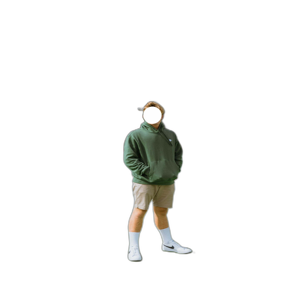

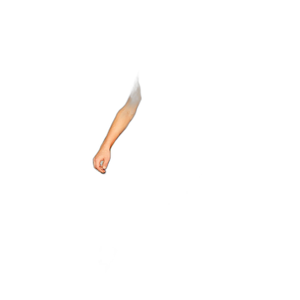

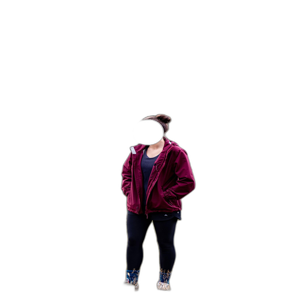

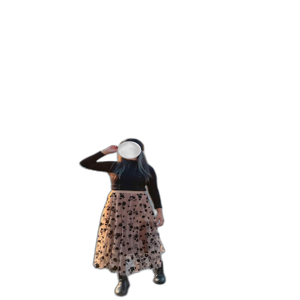

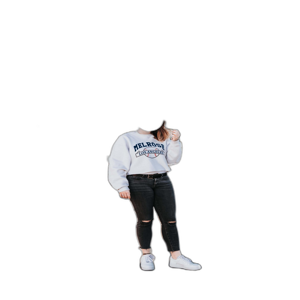

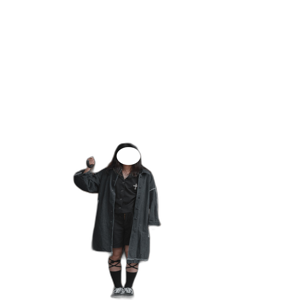

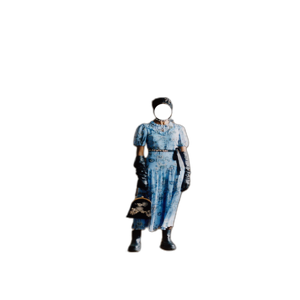

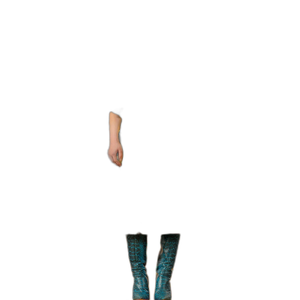

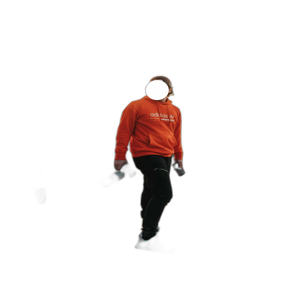

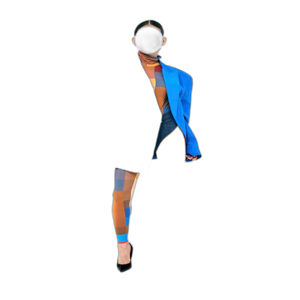

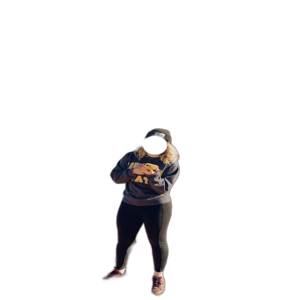

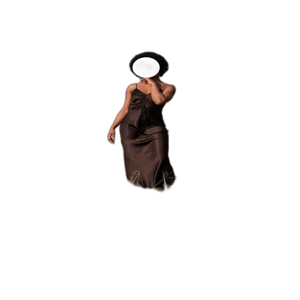

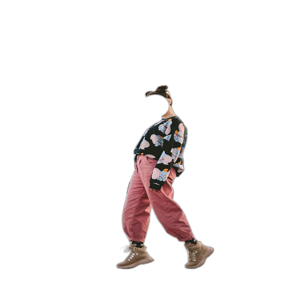

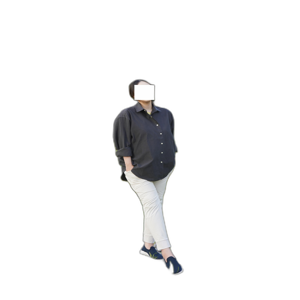

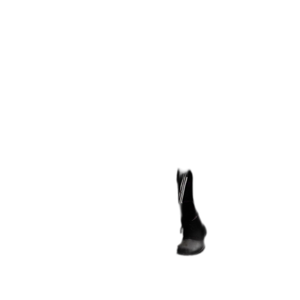

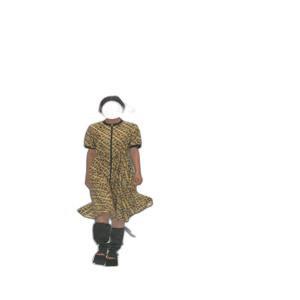

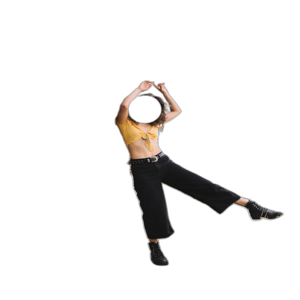

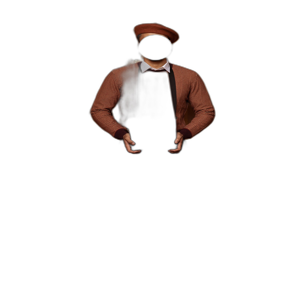

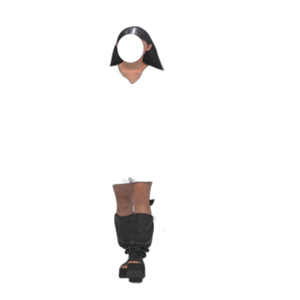

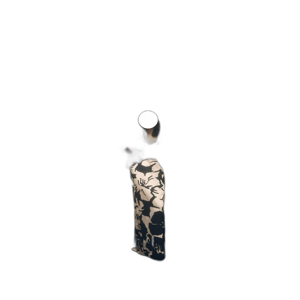

In [9]:
from IPython.display import display, Image
from PIL import Image as PILImage

# 이미지 표시
for path in anomalies[:20]:
    img = PILImage.open(path)  # 이미지 열기
    img = img.resize((300, 300))  # 이미지 리사이징 (300x300)
    display(img)  # 이미지 표시


### 배경 처리 고도화 모델 적용

분리가 제대로 안되는 그림들이 있는걸로 보아 U2net기반 모델의 한계가 있어 잘못 분리된 이미지에 대해 훨씬 좋은 성과를 보이고 있는 birefnet 구조의 모델을 사용해보았다.

birefnet은 2024년 DIS (Depth Image Segmentation): 깊이 정보를 사용하는 이미지 세분화 작업, COD (Camouflaged Object Detection): 위장된 객체를 탐지하는 작업, HRSOD (High-Resolution Salient Object Detection): 고해상도 이미지를 기반으로 주목할 만한 객체를 탐지하는 작업 에서 우수한 성과로 SOTA를 달성한 Image Segmentation모델이다.

다만, 좋은만큼 무거운 모델이라 1장 처리에 10초가 걸리고 CPU모델이 아닌 GPU모델이기에 병렬 계산을 하려면 여러 GPU가 있어야 한다.

In [10]:
import os
import io
from rembg import remove, new_session
from PIL import Image
def remove_background_single(image_path, output_dir, session):
    # 1. 이미지 가져오기
    with open(image_path, "rb") as img_file:
        input_img = img_file.read()
        
    # 2. 배경 제거
    out = remove(input_img, session=session)

    # 3. RGBA를 흰색 배경으로 변경
    out_img = Image.open(io.BytesIO(out))  # bytes 데이터를 PIL 이미지로 변환
    
    if out_img.mode == 'RGBA':
        # 흰색 배경을 가진 새로운 이미지 생성
        background = Image.new("RGB", out_img.size, (255, 255, 255))
        # 투명한 부분을 흰색으로 채움
        background.paste(out_img, (0, 0), out_img)
        out_img = background  # 흰색 배경을 가진 이미지로 대체
    
    # 4. 저장할 경로 지정
    img_name = os.path.basename(image_path)
    output_path = os.path.join(output_dir, img_name)

    # 5. 처리된 이미지 저장
    out_img.save(output_path, format='JPEG')  # JPEG로 저장

if __name__ == "__main__":
    # 단일 이미지 파일 경로와 출력 디렉토리 지정
    output_dir = './data/training_image_rembg_anormal'              # 저장할 디렉토리

    # 출력 디렉토리가 없다면 생성
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # 배경 제거 및 처리된 이미지 저장
    model_name = "birefnet-portrait"
    session = new_session(model_name)
    anomal_train_path = [path.replace('training_image_rembg', 'training_image') for path in anomalies]
    for image_path in tqdm(anomal_train_path):
        remove_background_single(image_path, output_dir, session=session)

  0%|                                                                                        | 0/23 [00:00<?, ?it/s]

  4%|███▍                                                                            | 1/23 [00:20<07:29, 20.43s/it]

  9%|██████▉                                                                         | 2/23 [00:42<07:25, 21.22s/it]

 13%|██████████▍                                                                     | 3/23 [01:00<06:37, 19.88s/it]

 17%|█████████████▉                                                                  | 4/23 [01:18<06:07, 19.32s/it]

 22%|█████████████████▍                                                              | 5/23 [01:35<05:26, 18.17s/it]

 26%|████████████████████▊                                                           | 6/23 [01:53<05:09, 18.19s/it]

 30%|████████████████████████▎                                                       | 7/23 [02:10<04:48, 18.02s/it]

 35%|███████████████████████████▊                                                    | 8/23 [02:29<04:32, 18.19s/it]

 39%|███████████████████████████████▎                                                | 9/23 [02:46<04:10, 17.86s/it]

 43%|██████████████████████████████████▎                                            | 10/23 [03:05<03:56, 18.19s/it]

 48%|█████████████████████████████████████▊                                         | 11/23 [03:21<03:29, 17.48s/it]

 52%|█████████████████████████████████████████▏                                     | 12/23 [03:38<03:10, 17.31s/it]

 57%|████████████████████████████████████████████▋                                  | 13/23 [03:56<02:54, 17.45s/it]

 61%|████████████████████████████████████████████████                               | 14/23 [04:12<02:34, 17.16s/it]

 65%|███████████████████████████████████████████████████▌                           | 15/23 [04:31<02:22, 17.76s/it]

 70%|██████████████████████████████████████████████████████▉                        | 16/23 [04:49<02:03, 17.70s/it]

 74%|██████████████████████████████████████████████████████████▍                    | 17/23 [05:05<01:43, 17.30s/it]

 78%|█████████████████████████████████████████████████████████████▊                 | 18/23 [05:21<01:24, 16.89s/it]

 83%|█████████████████████████████████████████████████████████████████▎             | 19/23 [05:38<01:07, 16.88s/it]

 87%|████████████████████████████████████████████████████████████████████▋          | 20/23 [05:54<00:50, 16.71s/it]

 91%|████████████████████████████████████████████████████████████████████████▏      | 21/23 [06:14<00:34, 17.47s/it]

 96%|███████████████████████████████████████████████████████████████████████████▌   | 22/23 [06:32<00:17, 17.60s/it]

100%|███████████████████████████████████████████████████████████████████████████████| 23/23 [06:49<00:00, 17.49s/it]

100%|███████████████████████████████████████████████████████████████████████████████| 23/23 [06:49<00:00, 17.79s/it]

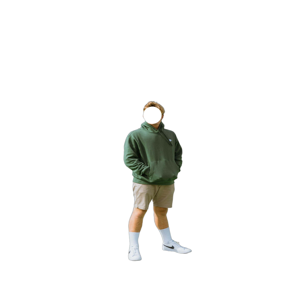

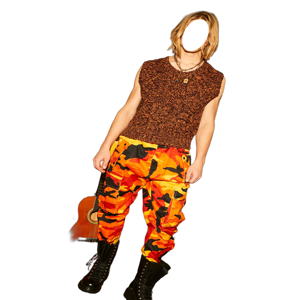

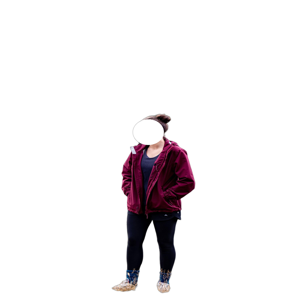

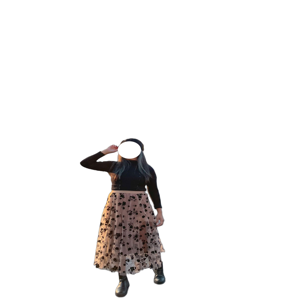

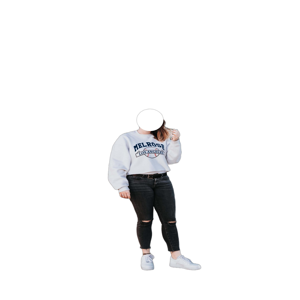

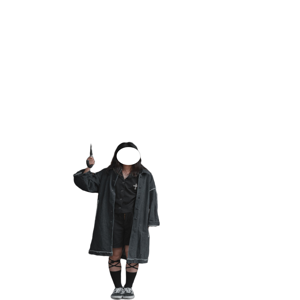

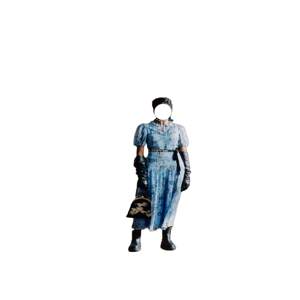

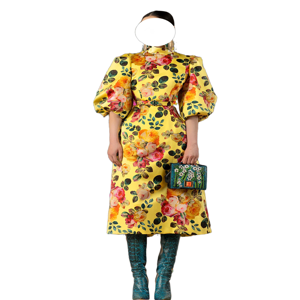

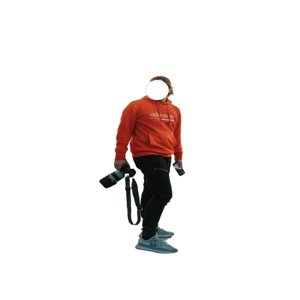

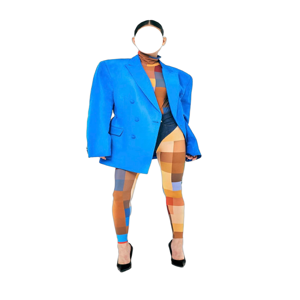

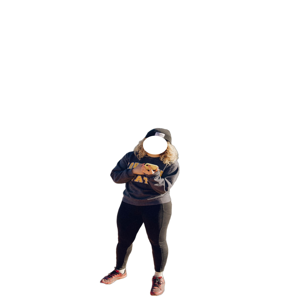

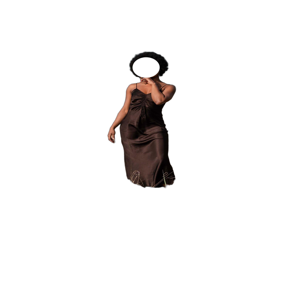

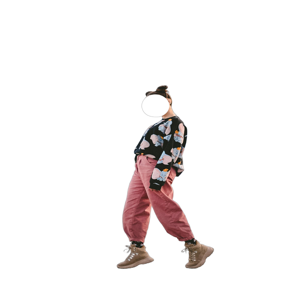

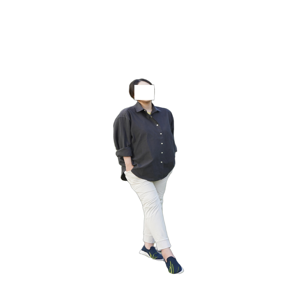

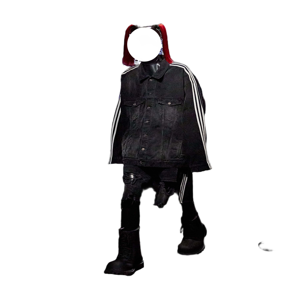

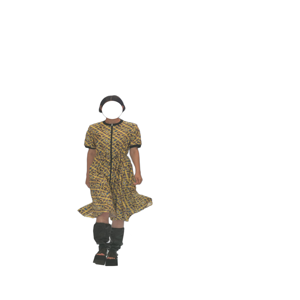

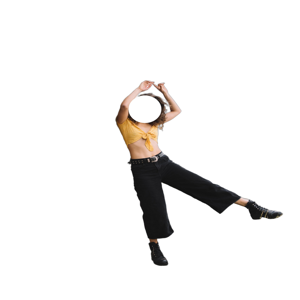

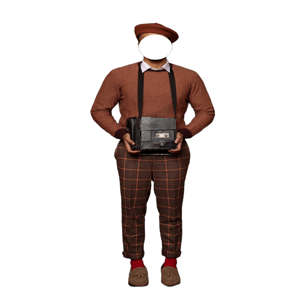

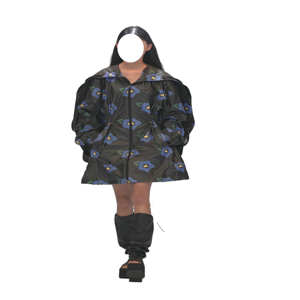

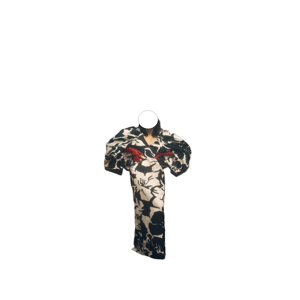

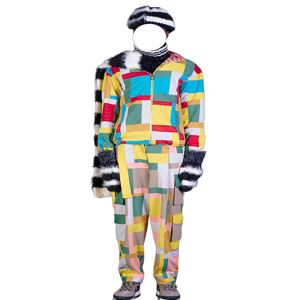

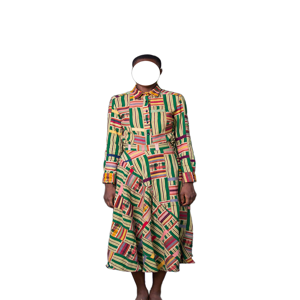

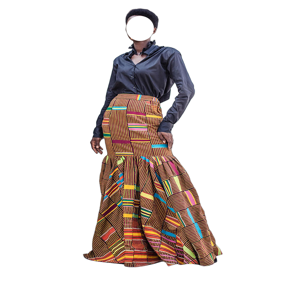

In [11]:
from IPython.display import display, Image
from PIL import Image as PILImage

# 이미지 표시
input_dir = './data/training_image_rembg_anormal'
image_paths = [os.path.join(input_dir, fname) for fname in os.listdir(input_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
for path in image_paths:
    img = PILImage.open(path)  # 이미지 열기
    img = img.resize((300, 300))  # 이미지 리사이징 (300x300)
    display(img)  # 이미지 표시

In [12]:
# import os
# import shutil

# # 경로 설정
# source_folder = './data/training_image_rembg_anormal'
# destination_folder = './data/training_image_rembg'

# # 소스 폴더의 모든 파일을 대상 폴더에 복사
# for filename in os.listdir(source_folder):
#     source_file = os.path.join(source_folder, filename)
#     destination_file = os.path.join(destination_folder, filename)
    
#     # 파일이 존재하면 덮어쓰기
#     if os.path.isfile(source_file):
#         shutil.copyfile(source_file, destination_file)
#         print(f"'{source_file}'를 '{destination_file}'에 덮어썼습니다.")

기존에 Segmentation이 어려웠던 이미지들을 모두 잘 분리한 것을 볼 수 있다.
패션 데이터에서 배경 분리는 매우 중요한 요소이므로 오랜 시간이 걸리더라도 훈련셋 전체를 Birefnet으로 분리하기로 결정하였다.

In [13]:
# input_dir = './data/training_image'  # 처리할 이미지가 있는 디렉토리
# output_dir = './data/training_image_birefnet'   # 처리된 이미지 저장할 디렉토리

# # 입력 디렉토리 내 모든 이미지 파일 경로 리스트 만들기
# image_paths = [os.path.join(input_dir, fname) for fname in os.listdir(input_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]

# # 출력 디렉토리가 없다면 생성
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# # 배경 제거 및 처리된 이미지 저장
# model_name = "birefnet-portrait"
# session = new_session(model_name)

# for image_path in tqdm(image_paths):
#     remove_background_single(image_path, output_dir, session=session)

In [14]:
# import cv2
# import numpy as np
# import os
# from PIL import Image

# def extract_bounding_box(image_path, output_dir):
#     # 이미지 불러오기
#     img = cv2.imread(image_path)
    
#     # 흰색 배경을 더 정확하게 인식하기 위해 inRange 사용
#     lower_white = np.array([200, 200, 200], dtype=np.uint8)
#     upper_white = np.array([255, 255, 255], dtype=np.uint8)
    
#     # 흰색 배경 제외한 마스크 생성
#     mask = cv2.inRange(img, lower_white, upper_white)
#     mask_inv = cv2.bitwise_not(mask)  # 흰색 배경 제외한 부분만 남김
    
#     # 바운딩 박스 좌표 계산
#     contours, _ = cv2.findContours(mask_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
#     if len(contours) == 0:
#         print(f"인물 영역을 찾지 못했습니다: {image_path}")
#         return
    
#     # 여러 개의 바운딩 박스를 처리하기 위해 모든 컨투어에서 가장 큰 사각형 찾기
#     x_min, y_min, x_max, y_max = np.inf, np.inf, 0, 0
    
#     for contour in contours:
#         x, y, w, h = cv2.boundingRect(contour)
#         x_min = min(x_min, x)
#         y_min = min(y_min, y)
#         x_max = max(x_max, x + w)
#         y_max = max(y_max, y + h)
    
#     # 원본 이미지에서 해당 바운딩 박스 영역만 crop
#     cropped_img = img[y_min:y_max, x_min:x_max]
    
#     # 출력 디렉토리 생성
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)
    
#     # 잘라낸 이미지 저장 경로 설정
#     img_name = os.path.basename(image_path).split('.')[0]
#     output_path = os.path.join(output_dir, f"{img_name}.jpg")
    
#     # 잘라낸 이미지 저장
#     cv2.imwrite(output_path, cropped_img)

# if __name__ == "__main__":
#     input_dir = './data/training_image_rembg'  # 처리할 이미지가 있는 디렉토리
#     output_dir = './data/training_image_cropped'  # 잘라낸 이미지 저장 디렉토리
    
#     # 입력 디렉토리 내 모든 이미지 파일 경로 리스트 만들기
#     image_paths = [os.path.join(input_dir, fname) for fname in os.listdir(input_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
#     # 모든 이미지에서 인물 부분만 잘라내기
#     for image_path in tqdm(image_paths):
#         extract_bounding_box(image_path, output_dir)